In [1]:
import random
import numpy as np
import os

def set_all_seeds(seed=42):
    """
    Закрепляет все возможные сиды для воспроизводимости.
    
    Параметры:
    seed (int): Значение сида.
    """
    random.seed(seed)
    
    np.random.seed(seed)
    
    os.environ['PYTHONHASHSEED'] = str(seed)
    
    try:
        import tensorflow as tf
        tf.random.set_seed(seed)
        print("TensorFlow seed set.")
    except ImportError:
        print("TensorFlow not installed.")
    
    try:
        import torch
        torch.manual_seed(seed)
        if torch.cuda.is_available():
            torch.cuda.manual_seed_all(seed)
        print("PyTorch seed set.")
    except ImportError:
        print("PyTorch not installed.")

set_all_seeds(42)

TensorFlow not installed.
PyTorch not installed.


In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install xlrd

In [4]:
import pandas as pd
import numpy as np

In [5]:
su26218rmfs6 = pd.read_csv('РМ - проект - котировки облигации/SU26218RMFS6_20200101_20240101.csv', index_col='DATE')[['TICKER', 'CLOSE']]
su26219rmfs4 = pd.read_csv('РМ - проект - котировки облигации/SU26219RMFS4_200101_240101.csv', index_col='DATE')[['TICKER', 'CLOSE']]
su26222rmfs8 = pd.read_csv('РМ - проект - котировки облигации/SU26222RMFS8_200101_240101.csv', index_col='DATE')[['TICKER', 'CLOSE']]
su26227rmfs8 = pd.read_csv('РМ - проект - котировки облигации/SU26227RMFS7_200101_240101.csv', index_col='DATE')[['TICKER', 'CLOSE']]
su26229rmfs4 = pd.read_csv('РМ - проект - котировки облигации/SU26229RMFS3_200101_240101.csv', index_col='DATE')[['TICKER', 'CLOSE']]

imoex_me = pd.read_csv('данные пункт е fixed/IMOEX.ME (в рублях).csv', index_col='Date')[['Open']].rename(columns={'Open': 'imoex'})
rts_index = pd.read_csv('данные пункт е fixed/Прошлые данные - Индекс РТС (в долларах).csv', index_col='Дата')[['Цена']].rename(columns={'Цена': 'rts'})
brent_oil = pd.read_csv('данные пункт е fixed/нефть-brent (в долларах).csv', index_col='Дата')[['Значение']].rename(columns={'Значение': 'brent'})

# stock_quotes = pd.read_csv('котировки акций.csv', index_col='DATE')
loan_percent = pd.read_csv('кривая безкупонной доходности.csv', sep=';', index_col='date')
dollar = pd.read_csv('данные пункт е fixed/Прошлые данные - USD_RUB.csv', index_col='Дата')[['Цена']].rename(columns={'Цена': 'USD'})
euro = pd.read_csv('данные пункт е fixed/Прошлые данные - EUR_RUB.csv', index_col='Дата')[['Цена']].rename(columns={'Цена': 'EUR'})
CB = pd.read_csv('СТАВКА ЦБ.csv', sep=' ', index_col='Дата').rename(columns={'Ставка': 'CB'})
stocks = pd.read_csv('котировки акций.csv', index_col='DATE')

In [6]:
# stock_quotes.index = pd.to_datetime(stock_quotes.index, dayfirst=True)
su26218rmfs6.index = pd.to_datetime(su26218rmfs6.index, format='%Y-%m-%d')
su26219rmfs4.index = pd.to_datetime(su26219rmfs4.index, format='%Y-%m-%d')
su26222rmfs8.index = pd.to_datetime(su26222rmfs8.index, format='%Y-%m-%d')
su26227rmfs8.index = pd.to_datetime(su26227rmfs8.index, format='%Y-%m-%d')
su26229rmfs4.index = pd.to_datetime(su26229rmfs4.index, format='%Y-%m-%d')
imoex_me.index = pd.to_datetime(imoex_me.index, format='%Y-%m-%d')
rts_index.index = pd.to_datetime(rts_index.index, dayfirst=True)
loan_percent.index = pd.to_datetime(loan_percent.index, dayfirst=True)
brent_oil.index = pd.to_datetime(brent_oil.index, dayfirst=True)
CB.index = pd.to_datetime(CB.index, dayfirst=True)
dollar.index = pd.to_datetime(dollar.index, dayfirst=True)
euro.index = pd.to_datetime(euro.index, dayfirst=True)
stocks.index = pd.to_datetime(stocks.index, dayfirst=True)

/tmp/ipykernel_7875/2628436320.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_oil.index = pd.to_datetime(brent_oil.index, dayfirst=True)


In [7]:
stocks

,SBER,PIKK,ROSN,BELU,MGNT,NLMK,KROT,CHMF,NVTK,PHOR
DATE,,,,,,,,,,
2020-01-04,255,407,456,9,726,3445,5,144,5,309
2020-01-07,253,9,405,455,6,729,3416,141,94,308
2020-01-09,259,15,407,452,717,3427,139,5,314,5
2020-01-10,257,99,406,6,460,2,723,3348,141,96
2020-01-11,258,19,407,5,473,5,725,3319,5,143
...,...,...,...,...,...,...,...,...,...,...
2023-12-26,271,8,685,584,45,5385,6939,5,177,2
2023-12-27,271,9,675,2,589,3,5364,6920,5,179
2023-12-28,271,8,663,4,594,55,5333,6982,5,179


In [8]:
su26218rmfs6.columns = su26218rmfs6.columns + "_" + su26218rmfs6['TICKER'][0]
su26219rmfs4.columns = su26219rmfs4.columns + "_" + su26219rmfs4['TICKER'][0]
su26222rmfs8.columns = su26222rmfs8.columns + "_" + su26222rmfs8['TICKER'][0]
su26227rmfs8.columns = su26227rmfs8.columns + "_" + su26227rmfs8['TICKER'][0]
su26229rmfs4.columns = su26229rmfs4.columns + "_" + su26229rmfs4['TICKER'][0]

loan_percent.columns = "loan_percent_curve_" + loan_percent.columns

/tmp/ipykernel_7875/359261028.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  su26218rmfs6.columns = su26218rmfs6.columns + "_" + su26218rmfs6['TICKER'][0]
/tmp/ipykernel_7875/359261028.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  su26219rmfs4.columns = su26219rmfs4.columns + "_" + su26219rmfs4['TICKER'][0]
/tmp/ipykernel_7875/359261028.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  su26222rmfs8.columns = su26222rmfs

In [9]:
tmp = su26218rmfs6.iloc[0,0]
su26218rmfs6.drop(columns=[f'TICKER_{tmp}'], inplace=True)
tmp = su26219rmfs4.iloc[0,0]
su26219rmfs4.drop(columns=[f'TICKER_{tmp}'], inplace=True)
tmp = su26222rmfs8.iloc[0,0]
su26222rmfs8.drop(columns=[f'TICKER_{tmp}'], inplace=True)
tmp = su26227rmfs8.iloc[0,0]
su26227rmfs8.drop(columns=[f'TICKER_{tmp}'], inplace=True)
tmp = su26229rmfs4.iloc[0,0]
su26229rmfs4.drop(columns=[f'TICKER_{tmp}'], inplace=True)

In [10]:
merged_df = pd.DataFrame(index = pd.date_range(start='2020-01-01', end='2024-01-01', freq='D'))
merged_df = merged_df.join(su26218rmfs6)
merged_df = merged_df.join(su26219rmfs4)
merged_df = merged_df.join(su26222rmfs8)
merged_df = merged_df.join(su26227rmfs8)
merged_df = merged_df.join(su26229rmfs4)
merged_df = merged_df.join(imoex_me)
merged_df = merged_df.join(rts_index)
merged_df = merged_df.join(loan_percent)
merged_df = merged_df.join(brent_oil)
merged_df = merged_df.join(CB)
merged_df = merged_df.join(dollar)
merged_df = merged_df.join(euro)
merged_df = merged_df.join(stocks)

In [11]:
merged_df.rts = merged_df.rts.str.replace(".", "")
for column in merged_df.columns:
    if merged_df[column].dtype == 'object':
        merged_df[column] = merged_df[column].str.replace(",", '.').astype(float)

In [12]:
merged_df

,CLOSE_SU26218RMFS6,CLOSE_SU26219RMFS4,CLOSE_SU26222RMFS8,CLOSE_SU26227RMFS7,CLOSE_SU26229RMFS3,imoex,rts,"loan_percent_curve_0,25","loan_percent_curve_0,5","loan_percent_curve_0,75",...,SBER,PIKK,ROSN,BELU,MGNT,NLMK,KROT,CHMF,NVTK,PHOR
2020-01-01,NaN,NaN,NaN,NaN,NaN,3059.199951,1564.18,4.79,4.94,5.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,118.490,109.099,104.851,105.769,105.350,3059.199951,1564.18,4.97,5.08,5.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,255.0,407.0,456.0,9.0,726.0,3445.0,5.0,144.0,5.0,309.0
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-28,84.411,91.928,96.800,97.424,91.000,3099.560059,1090.93,12.78,12.72,12.65,...,271.0,8.0,663.0,4.0,594.0,55.0,5333.0,6982.0,5.0,179.0
2023-12-29,84.771,91.900,96.592,97.784,91.181,3092.659912,1083.48,11.73,12.35,12.66,...,271.0,74.0,668.0,7.0,591.0,9.0,5333.0,6970.0,179.0,4.0
2023-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,270.0,82.0,677.0,593.0,2.0,5347.0,7006.0,178.0,5.0,2389.0
2023-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
other = [
        'CB', 'SBER', 'PIKK', 'ROSN', 
        'BELU', 'MGNT', 'NLMK', 'KROT',
        'CHMF', 'NVTK', 'PHOR'
        ]

cols = merged_df.columns[merged_df.columns.str.startswith('CLOSE_SU')]
cols = cols.append(pd.Index(other))

easy_columns = merged_df.drop(cols, axis = 1).columns

for column in easy_columns:
    merged_df[column] = merged_df[column].ffill()

mask_before = merged_df.index <= '2020-01-04'
mask_after = merged_df.index >= '2020-01-03'

# Применяем frontfill и backfill для колонок, начинающихся с CLOSE_SU
merged_df.loc[mask_before, cols] = merged_df.loc[mask_before, cols].bfill()
merged_df.loc[mask_after, cols] = merged_df.loc[mask_after, cols].ffill()


In [14]:
merged_df

,CLOSE_SU26218RMFS6,CLOSE_SU26219RMFS4,CLOSE_SU26222RMFS8,CLOSE_SU26227RMFS7,CLOSE_SU26229RMFS3,imoex,rts,"loan_percent_curve_0,25","loan_percent_curve_0,5","loan_percent_curve_0,75",...,SBER,PIKK,ROSN,BELU,MGNT,NLMK,KROT,CHMF,NVTK,PHOR
2020-01-01,118.490,109.099,104.851,105.769,105.350,3059.199951,1564.18,4.79,4.94,5.08,...,255.0,407.0,456.0,9.0,726.0,3445.0,5.0,144.0,5.0,309.0
2020-01-02,118.490,109.099,104.851,105.769,105.350,3059.199951,1564.18,4.79,4.94,5.08,...,255.0,407.0,456.0,9.0,726.0,3445.0,5.0,144.0,5.0,309.0
2020-01-03,118.490,109.099,104.851,105.769,105.350,3059.199951,1564.18,4.97,5.08,5.18,...,255.0,407.0,456.0,9.0,726.0,3445.0,5.0,144.0,5.0,309.0
2020-01-04,118.490,109.099,104.851,105.769,105.350,3059.199951,1564.18,4.97,5.08,5.18,...,255.0,407.0,456.0,9.0,726.0,3445.0,5.0,144.0,5.0,309.0
2020-01-05,118.490,109.099,104.851,105.769,105.350,3059.199951,1564.18,4.97,5.08,5.18,...,255.0,407.0,456.0,9.0,726.0,3445.0,5.0,144.0,5.0,309.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-28,84.411,91.928,96.800,97.424,91.000,3099.560059,1090.93,12.78,12.72,12.65,...,271.0,8.0,663.0,4.0,594.0,55.0,5333.0,6982.0,5.0,179.0
2023-12-29,84.771,91.900,96.592,97.784,91.181,3092.659912,1083.48,11.73,12.35,12.66,...,271.0,74.0,668.0,7.0,591.0,9.0,5333.0,6970.0,179.0,4.0
2023-12-30,84.771,91.900,96.592,97.784,91.181,3092.659912,1083.48,11.73,12.35,12.66,...,270.0,82.0,677.0,593.0,2.0,5347.0,7006.0,178.0,5.0,2389.0
2023-12-31,84.771,91.900,96.592,97.784,91.181,3092.659912,1083.48,11.73,12.35,12.66,...,270.0,82.0,677.0,593.0,2.0,5347.0,7006.0,178.0,5.0,2389.0


In [15]:
merged_df.columns

Index(['CLOSE_SU26218RMFS6', 'CLOSE_SU26219RMFS4', 'CLOSE_SU26222RMFS8',
       'CLOSE_SU26227RMFS7', 'CLOSE_SU26229RMFS3', 'imoex', 'rts',
       'loan_percent_curve_0,25', 'loan_percent_curve_0,5',
       'loan_percent_curve_0,75', 'loan_percent_curve_1',
       'loan_percent_curve_2', 'loan_percent_curve_3', 'loan_percent_curve_5',
       'loan_percent_curve_7', 'loan_percent_curve_10',
       'loan_percent_curve_15', 'loan_percent_curve_20',
       'loan_percent_curve_30', 'brent', 'CB', 'USD', 'EUR', 'SBER', 'PIKK',
       'ROSN', 'BELU', 'MGNT', 'NLMK', 'KROT', 'CHMF', 'NVTK', 'PHOR'],
      dtype='object')

# Генерим фичи - риск факторы

In [16]:
VVP = pd.read_excel("VVP_kvartal_s 1995-2024.xlsx", sheet_name=2)
dates = [f"01-{(quartal*3 + 1):02d}-{2020+year}" for year in range(3) for quartal in range(4)]
VVP = pd.Series(data=VVP.iloc[3, 36:].T.values, index=pd.date_range('01-01-2020', '01-01-2024', 16))
VVP.index = pd.to_datetime(VVP.index)

merged_df['GDP'] = VVP
merged_df['GDP'] = merged_df['GDP'].ffill()

/tmp/ipykernel_7875/1161442331.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df['GDP'] = merged_df['GDP'].ffill()


In [17]:
# credits_overdue = pd.read_excel("302-09.xlsx", skiprows=6, index_col=0).iloc[:, 0]
# merged_df['credits_overdue'] = credits_overdue
# merged_df
# # merged_df['credits_overdue'] = merged_df['credits_overdue'].

In [18]:
df = pd.read_excel("obs_tabl20c_do_20240101.xlsx")

df = df.drop(index=[1, 59, 60, 61, 62, 63, 64])

# Transpose the dataframe
df_transposed = df.transpose()
df_transposed = df_transposed[1:]

# Set the first row as the header
df_transposed.columns = df_transposed.iloc[0]
df_transposed = df_transposed.drop(df_transposed.index[0])

# Set the index to the dates
df_transposed.index = df_transposed['Активы - в рублях и иностранной валюте']
df_transposed.index.name = 'Дата'
# df_transposed = df_transposed.iloc[:, 1:]
columns = [
    'Денежные средства (касса, чеки, денежные средства в пути, в банкоматах)',
    'Депозиты в Банке России',
    'Обязательные резервы в Банке России ',
    'Кредиты банкам',
    'Ценные бумаги',
    'Участие в уставных капиталах',
    'Кредитный портфель и прочие размещенные средства',
    'Основные средства и финансовая аренда',
    'Прочие активы'
]
df_transposed = df_transposed[columns]


merged_df  = merged_df.join(df_transposed)
merged_df[columns] = merged_df[columns].ffill()
merged_df

/home/owner/anaconda3/envs/ML/lib/python3.12/site-packages/pandas/core/indexes/base.py:7631: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(index_like, name=name, copy=copy)
/tmp/ipykernel_7875/578202884.py:32: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df[columns] = merged_df[columns].ffill()


,CLOSE_SU26218RMFS6,CLOSE_SU26219RMFS4,CLOSE_SU26222RMFS8,CLOSE_SU26227RMFS7,CLOSE_SU26229RMFS3,imoex,rts,"loan_percent_curve_0,25","loan_percent_curve_0,5","loan_percent_curve_0,75",...,GDP,"Денежные средства (касса, чеки, денежные средства в пути, в банкоматах)",Депозиты в Банке России,Обязательные резервы в Банке России,Кредиты банкам,Ценные бумаги,Участие в уставных капиталах,Кредитный портфель и прочие размещенные средства,Основные средства и финансовая аренда,Прочие активы
2020-01-01,118.490,109.099,104.851,105.769,105.350,3059.199951,1564.18,4.79,4.94,5.08,...,24865.958067,1593.697288,1027.628319,617.088447,8845.296374,11685.254149,2188.640415,53417.813498,1020.425022,2343.950384
2020-01-02,118.490,109.099,104.851,105.769,105.350,3059.199951,1564.18,4.79,4.94,5.08,...,24865.958067,1593.697288,1027.628319,617.088447,8845.296374,11685.254149,2188.640415,53417.813498,1020.425022,2343.950384
2020-01-03,118.490,109.099,104.851,105.769,105.350,3059.199951,1564.18,4.97,5.08,5.18,...,24865.958067,1593.697288,1027.628319,617.088447,8845.296374,11685.254149,2188.640415,53417.813498,1020.425022,2343.950384
2020-01-04,118.490,109.099,104.851,105.769,105.350,3059.199951,1564.18,4.97,5.08,5.18,...,24865.958067,1593.697288,1027.628319,617.088447,8845.296374,11685.254149,2188.640415,53417.813498,1020.425022,2343.950384
2020-01-05,118.490,109.099,104.851,105.769,105.350,3059.199951,1564.18,4.97,5.08,5.18,...,24865.958067,1593.697288,1027.628319,617.088447,8845.296374,11685.254149,2188.640415,53417.813498,1020.425022,2343.950384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-28,84.411,91.928,96.800,97.424,91.000,3099.560059,1090.93,12.78,12.72,12.65,...,38761.701765,1890.354953,1756.418792,271.706379,16830.988849,20863.603115,3642.316692,98750.386603,1429.811172,4665.372164
2023-12-29,84.771,91.900,96.592,97.784,91.181,3092.659912,1083.48,11.73,12.35,12.66,...,38761.701765,1890.354953,1756.418792,271.706379,16830.988849,20863.603115,3642.316692,98750.386603,1429.811172,4665.372164
2023-12-30,84.771,91.900,96.592,97.784,91.181,3092.659912,1083.48,11.73,12.35,12.66,...,38761.701765,1890.354953,1756.418792,271.706379,16830.988849,20863.603115,3642.316692,98750.386603,1429.811172,4665.372164
2023-12-31,84.771,91.900,96.592,97.784,91.181,3092.659912,1083.48,11.73,12.35,12.66,...,38761.701765,1890.354953,1756.418792,271.706379,16830.988849,20863.603115,3642.316692,98750.386603,1429.811172,4665.372164


In [19]:
merged_df['SVO'] = merged_df.index >= '2022-02-24'
merged_df['SBER_sanctions'] = merged_df.index >= '2022-04-06'
merged_df['ROSN_sanctions'] = merged_df.index >= '2022-03-15'
merged_df['BELUGA_sold_intern_rights'] = merged_df.index >= '2022-10-19'
merged_df['SEVERSTAL_stopped_EU'] = merged_df.index >= '2022-03-02'
merged_df['FOSAGRO_sanctions'] = merged_df.index >= '2022-11-15'


In [20]:
RU_inflation = pd.read_csv("russia.inflation.monthly (statbureau.org).csv")
RU_inflation = RU_inflation.drop(" Всего", axis=1)

RU_inflation_schlong = pd.melt(RU_inflation, id_vars=["Год"])
months = RU_inflation.columns[1:]

mapping = {v: k + 1 for k, v in dict(enumerate(months)).items()}

RU_inflation_schlong["Месяц"] = RU_inflation_schlong["variable"].map(mapping)
RU_inflation_schlong = RU_inflation_schlong.drop(["variable"], axis=1)
RU_inflation_schlong["Месяц"] = RU_inflation_schlong["Месяц"].apply(lambda elem: f"{elem:02}")

RU_inflation_schlong.index = pd.to_datetime(RU_inflation_schlong["Год"].astype(str) + "-" + RU_inflation_schlong["Месяц"].astype(str) + "-01")
merged_df["RU_inflation"] = RU_inflation_schlong["value"]
merged_df["RU_inflation"] = merged_df["RU_inflation"].ffill()

In [21]:
merged_df['imoex_ema7'] = merged_df['imoex'].ewm(span=7, adjust=False).mean()

In [22]:
columns_to_models = [
    'CLOSE_SU26218RMFS6', 'CLOSE_SU26219RMFS4', 'CLOSE_SU26222RMFS8',
    'CLOSE_SU26227RMFS7', 'CLOSE_SU26229RMFS3', 'SBER', 'PIKK',
    'ROSN', 'BELU', 'MGNT', 'NLMK', 'KROT', 'CHMF', 'NVTK', 'PHOR', 'USD', 'EUR'
]

columns_to_models = dict.fromkeys(columns_to_models, None)
print(columns_to_models.keys())

exog = merged_df.drop(columns = list(columns_to_models.keys()))[1:]
endogs = merged_df[list(columns_to_models.keys())].shift().dropna()



dict_keys(['CLOSE_SU26218RMFS6', 'CLOSE_SU26219RMFS4', 'CLOSE_SU26222RMFS8', 'CLOSE_SU26227RMFS7', 'CLOSE_SU26229RMFS3', 'SBER', 'PIKK', 'ROSN', 'BELU', 'MGNT', 'NLMK', 'KROT', 'CHMF', 'NVTK', 'PHOR', 'USD', 'EUR'])


In [23]:
num_features = 10

In [24]:
!pip install statsmodels

In [25]:
# columns_to_subexog - экзогенные по колонке
# columns_to_models - сюда класть модели относительно фичей
# columns_to_params - настроим после
# {target_column: ((p,d,q,P,Q,D,m))}
# p_values, d_values, q_values, P_values, D_values, Q_values, m_values = columns_to_params[column]

columns_to_params = {}


import itertools
import math
import warnings
from sklearn.metrics import r2_score, mean_absolute_error
from tqdm import tqdm
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA



# Теперь сделаем анализ рядов фич

In [39]:
import matplotlib.pyplot as plt
import scipy.stats as scs
import statsmodels.api as sm
%matplotlib inline 
def tsplot(y, name, lags=None, figsize=(15, 15), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title(f'Time Series Analysis Plots: {name}')
        
        sm.graphics.tsa.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        sm.graphics.tsa.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()



In [40]:
def analyze_time_series(ts, name):
    """
    Выводит параметры распределения временного ряда и строит график его распределения.

    Parameters:
    ts (pd.Series): Временной ряд.

    Returns:
    dict: Словарь с параметрами распределения.

    """
    ts = ts.astype(float) 

    distribution_params = {
        'mean': ts.mean(),
        'std_dev': ts.std(),
        'median': ts.median(),
        'q1': ts.quantile(0.25),
        'q3': ts.quantile(0.75),
        'min': ts.min(),
        'max': ts.max(),
    }

    # Построение графика распределения
    plt.figure(figsize=(10, 6))
    plt.hist(ts, bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'Distribution of {name} Time Series')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    return distribution_params

In [30]:
import matplotlib.pyplot as plt

def analyze_time_series(ts, name):
    """
    Выводит параметры распределения временного ряда и строит график его распределения.

    Parameters:
    ts (pd.Series): Временной ряд.

    Returns:
    dict: Словарь с параметрами распределения.

    """

    # Построение графика распределения
    plt.figure(figsize=(10, 6))
    plt.plot(ts.index,ts)
    plt.title(f'{name} Time Series')
    plt.ylabel(name)
    plt.grid(True)
    plt.show()

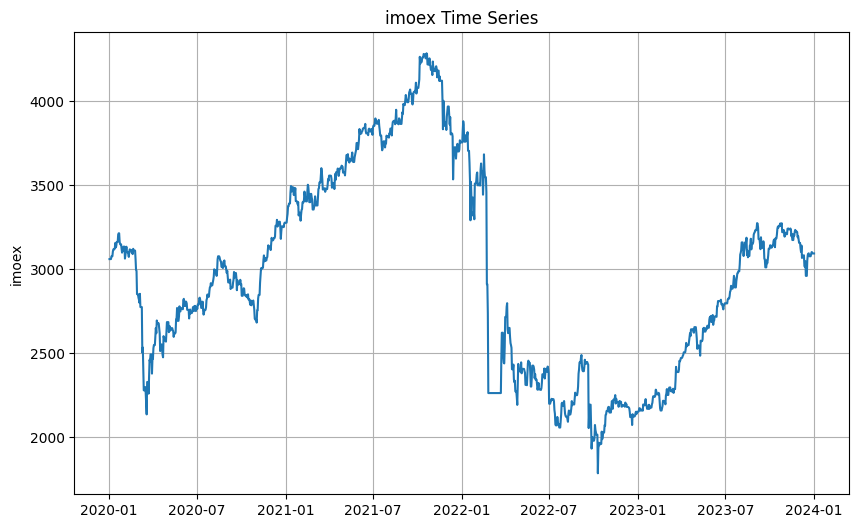

imoex: None


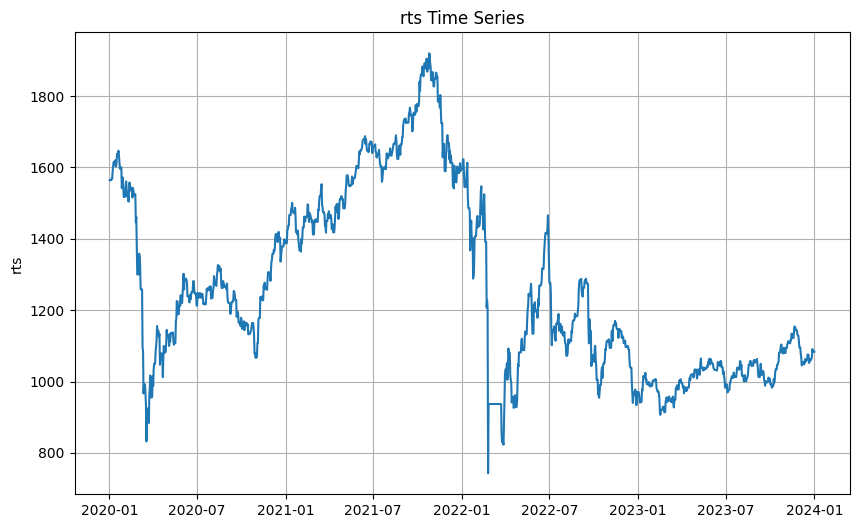

rts: None


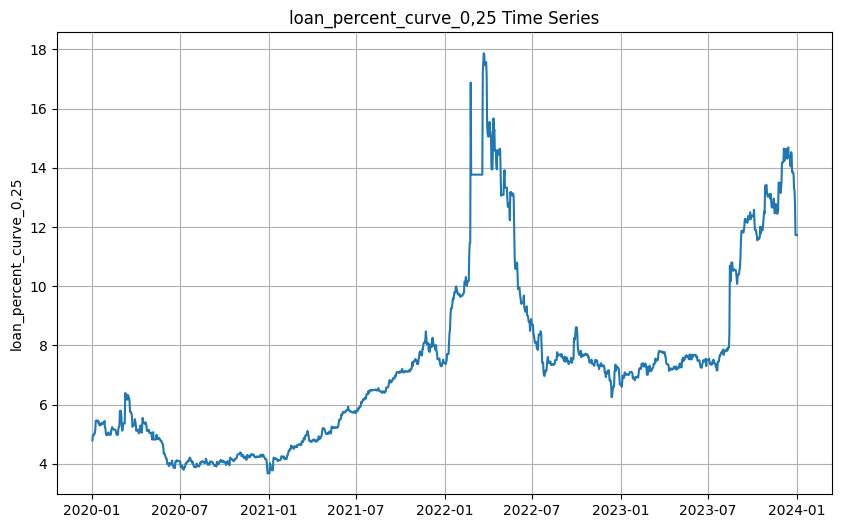

loan_percent_curve_0,25: None


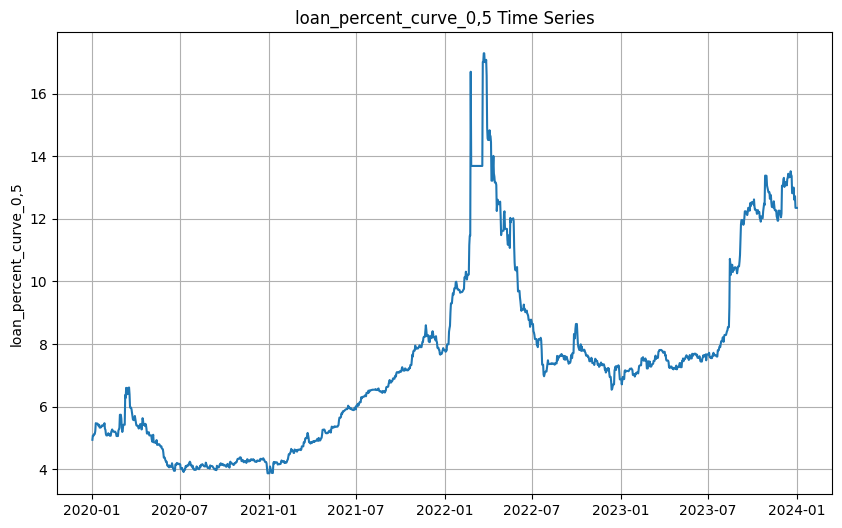

loan_percent_curve_0,5: None


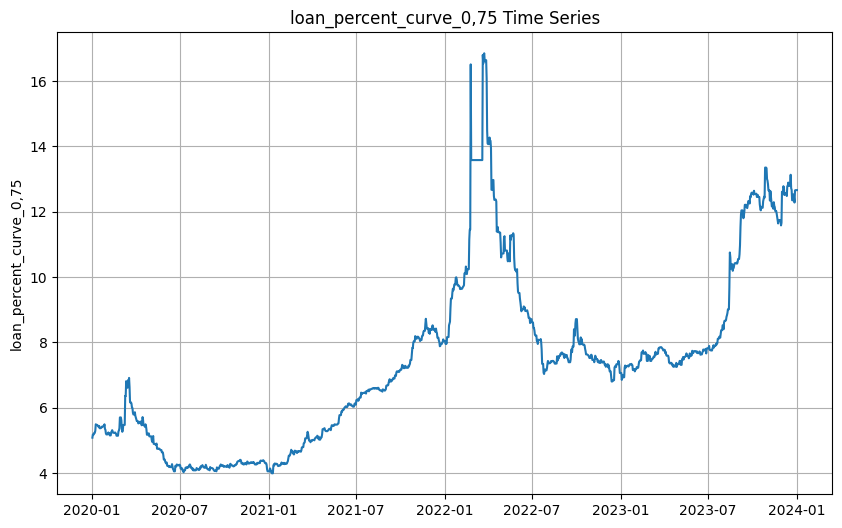

loan_percent_curve_0,75: None


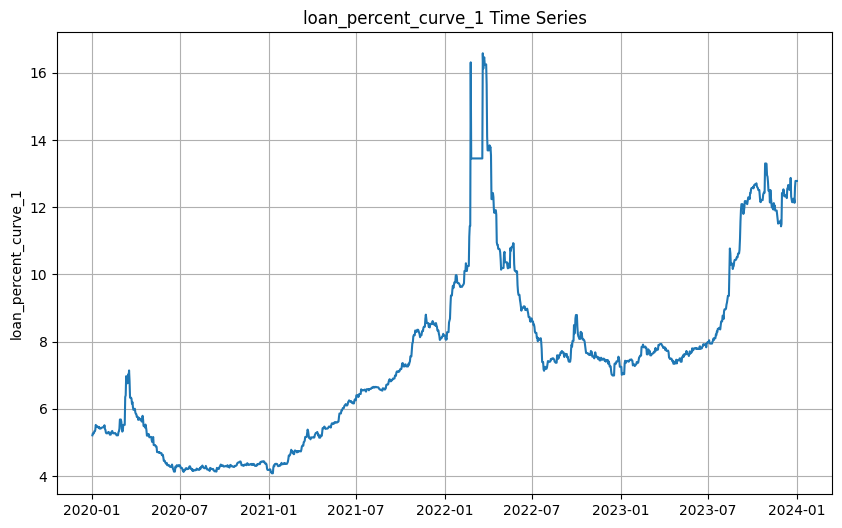

loan_percent_curve_1: None


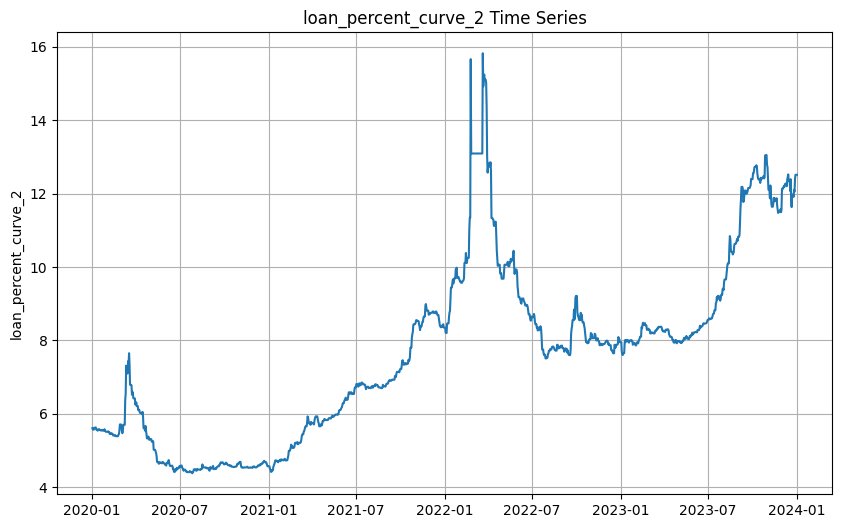

loan_percent_curve_2: None


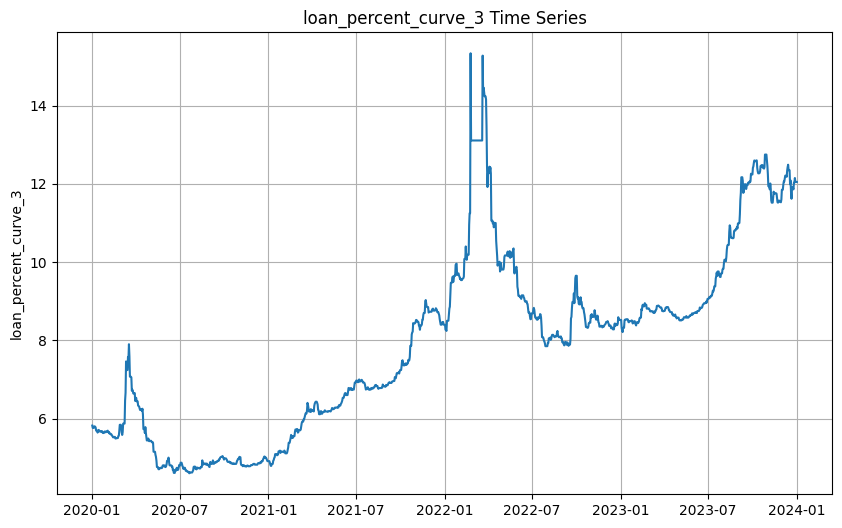

loan_percent_curve_3: None


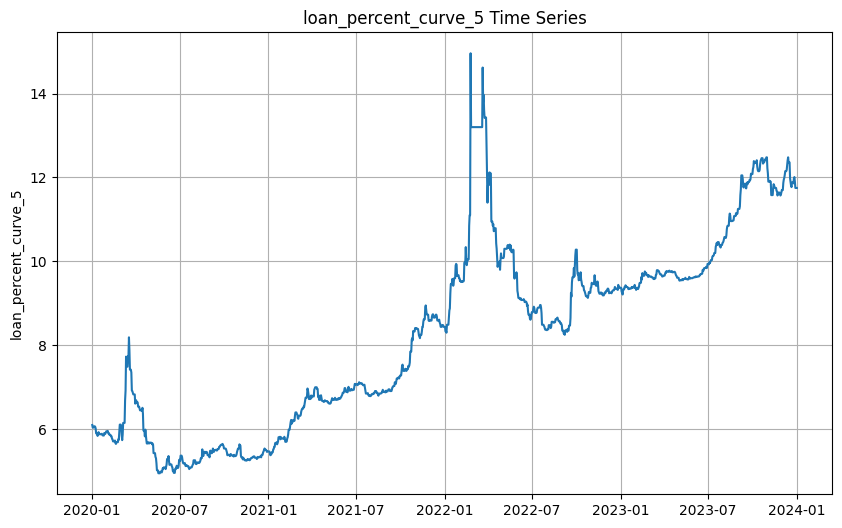

loan_percent_curve_5: None


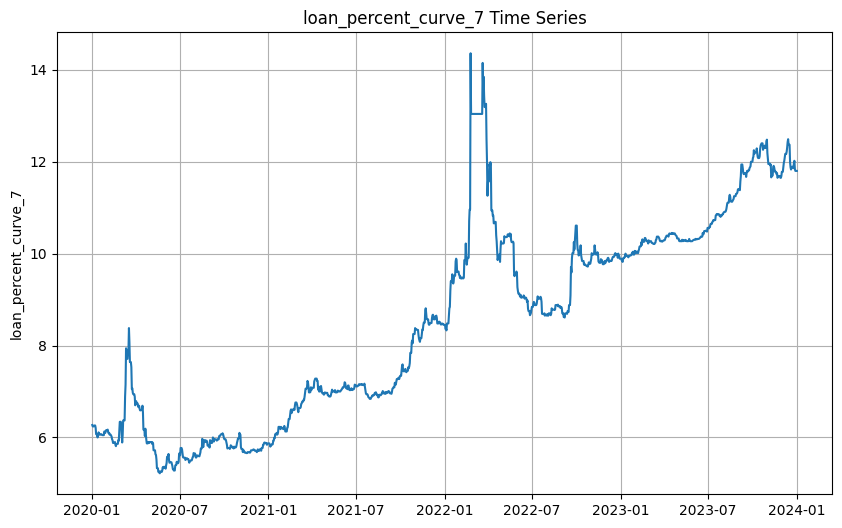

loan_percent_curve_7: None


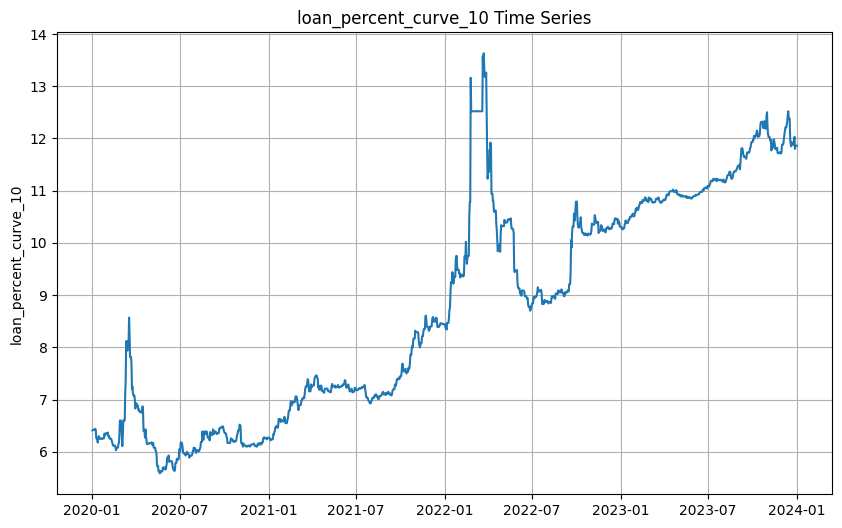

loan_percent_curve_10: None


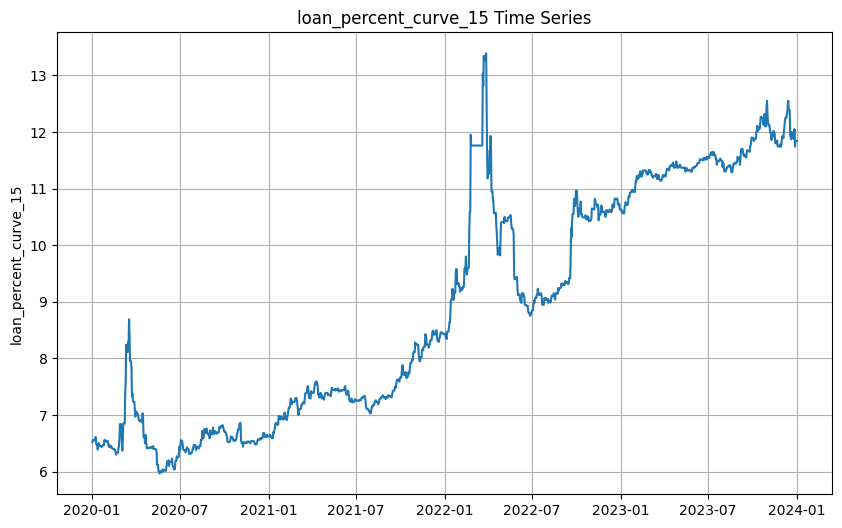

loan_percent_curve_15: None


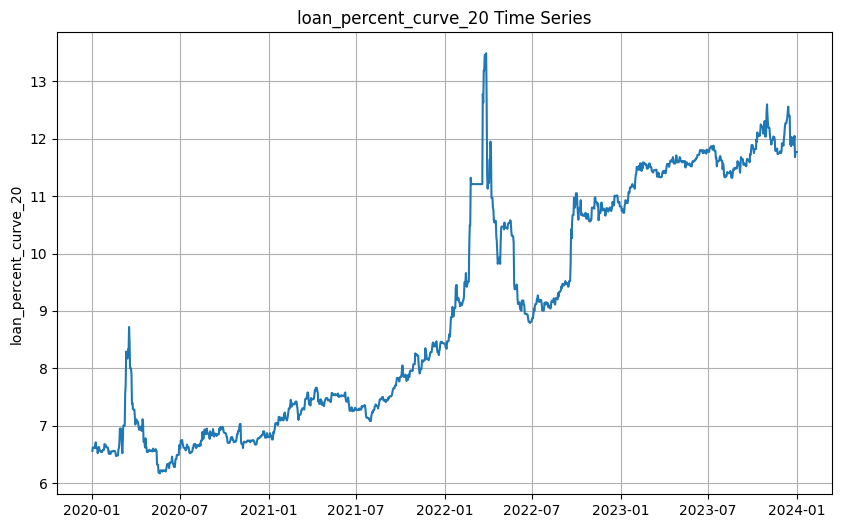

loan_percent_curve_20: None


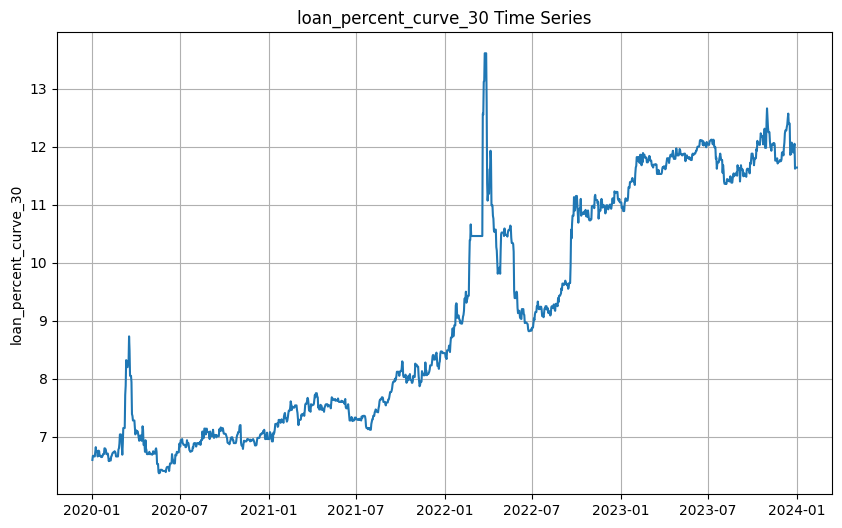

loan_percent_curve_30: None


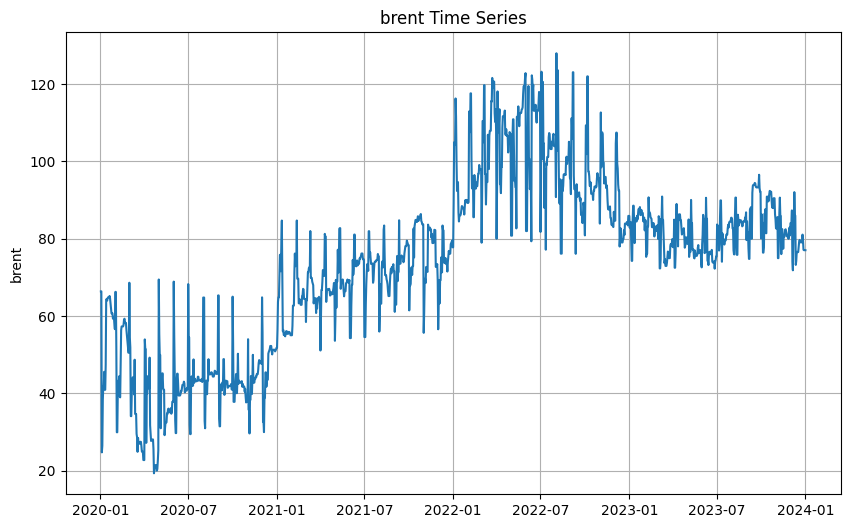

brent: None


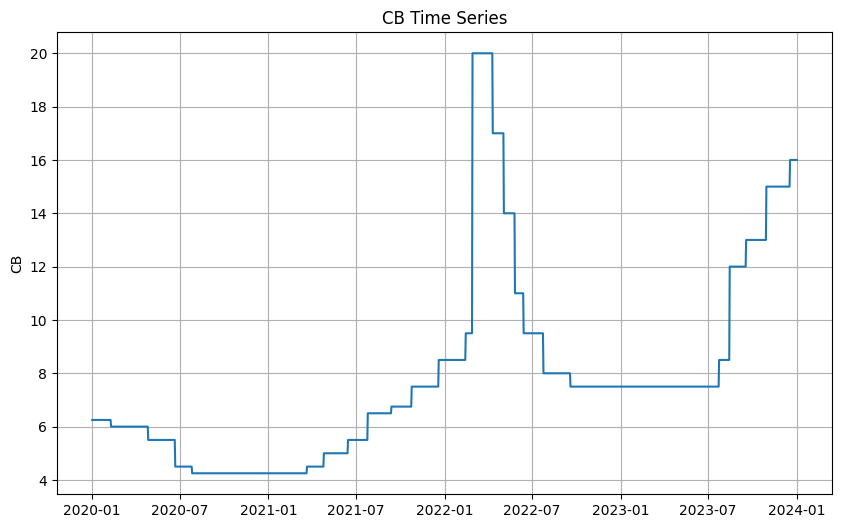

CB: None


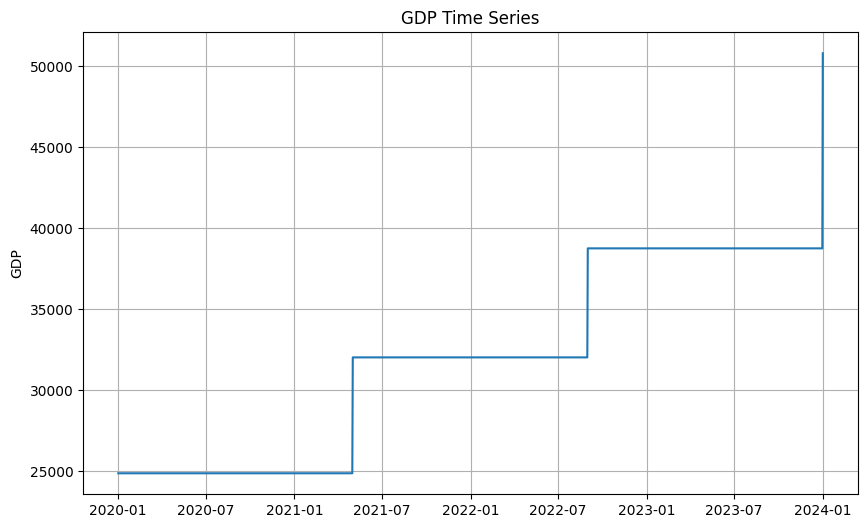

GDP: None


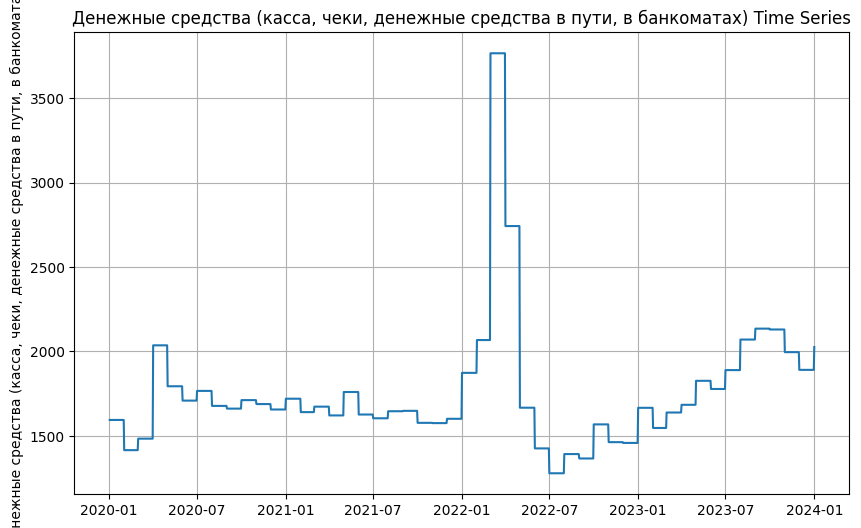

Денежные средства (касса, чеки, денежные средства в пути, в банкоматах): None


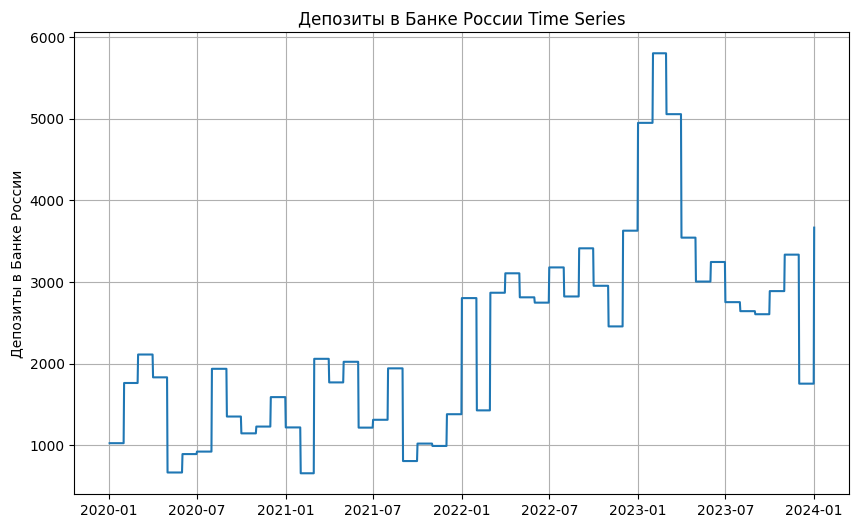

Депозиты в Банке России: None


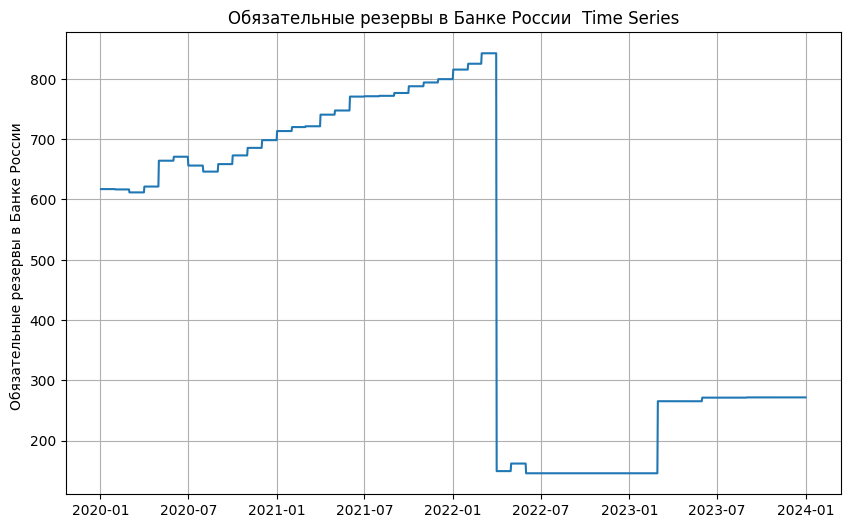

Обязательные резервы в Банке России : None


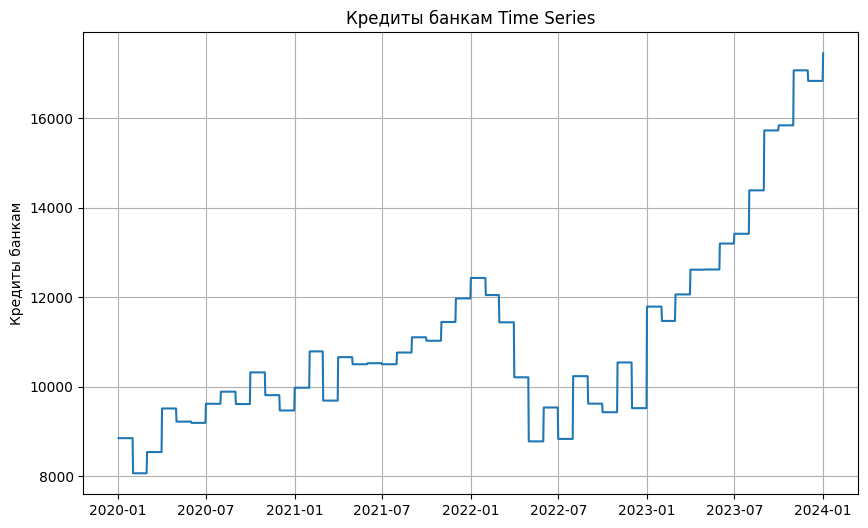

Кредиты банкам: None


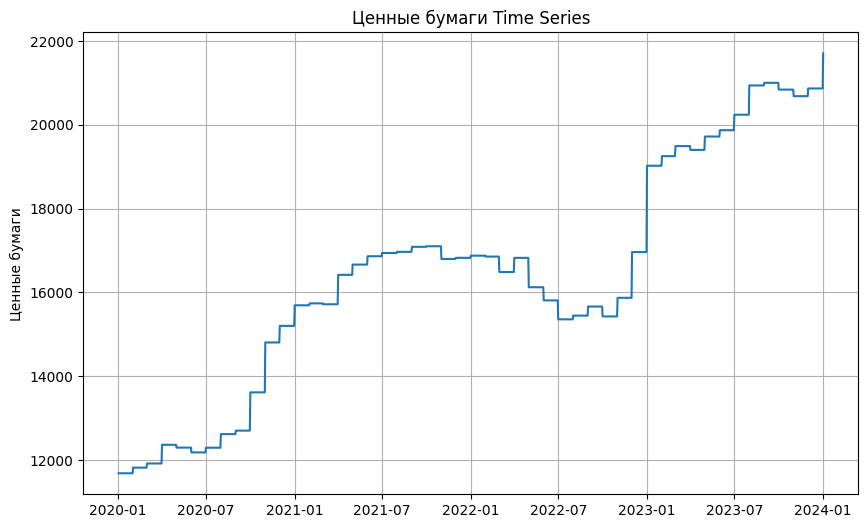

Ценные бумаги: None


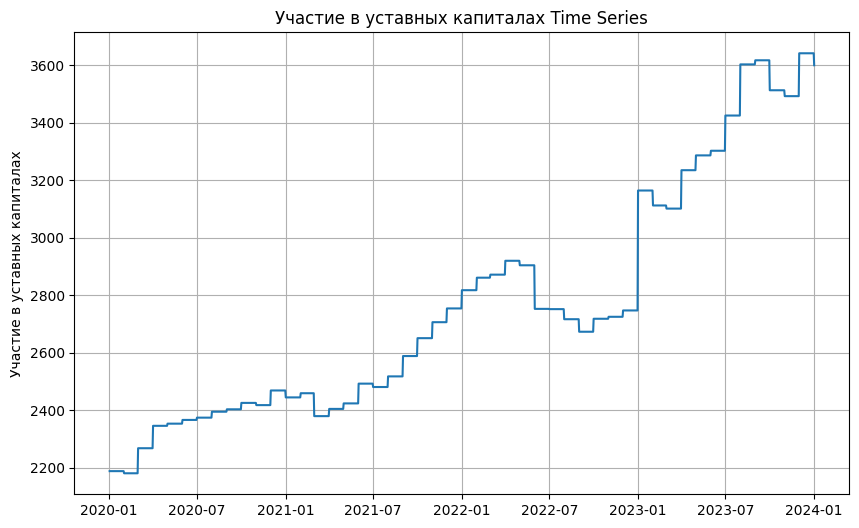

Участие в уставных капиталах: None


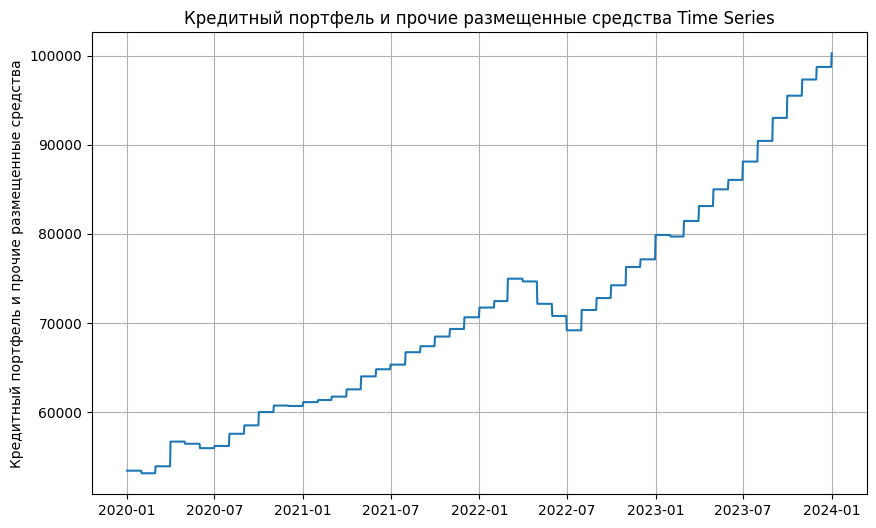

Кредитный портфель и прочие размещенные средства: None


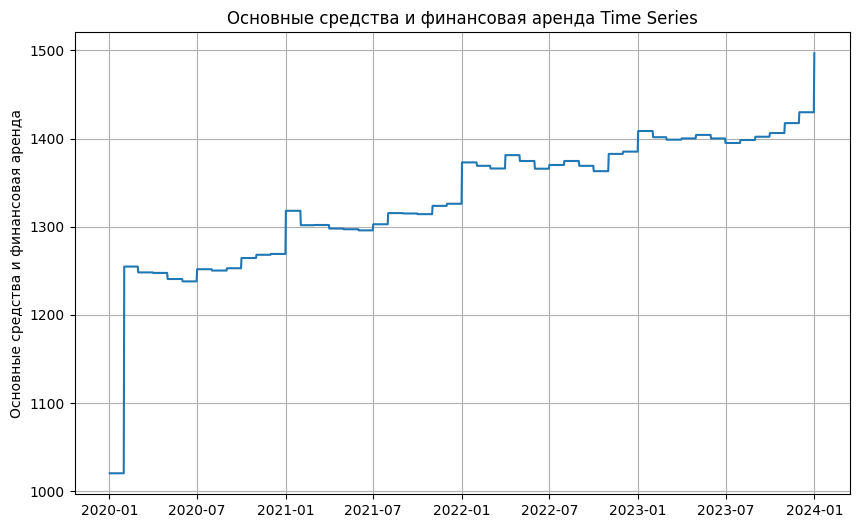

Основные средства и финансовая аренда: None


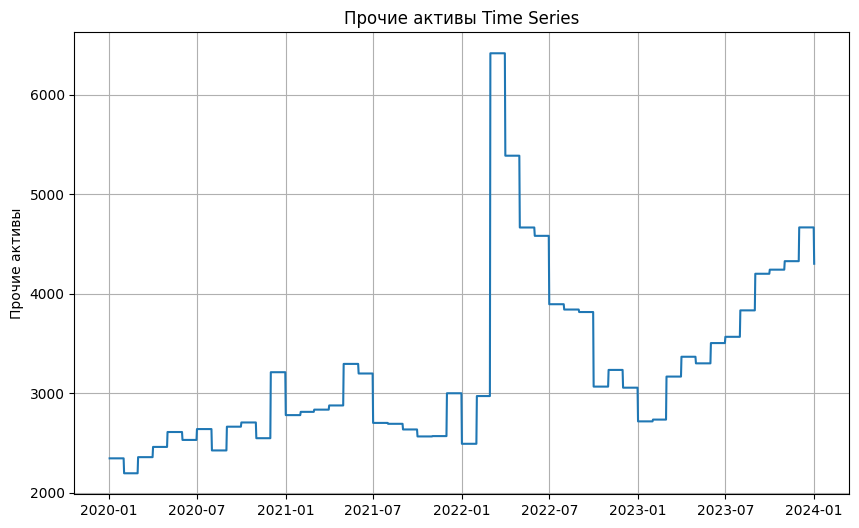

Прочие активы: None


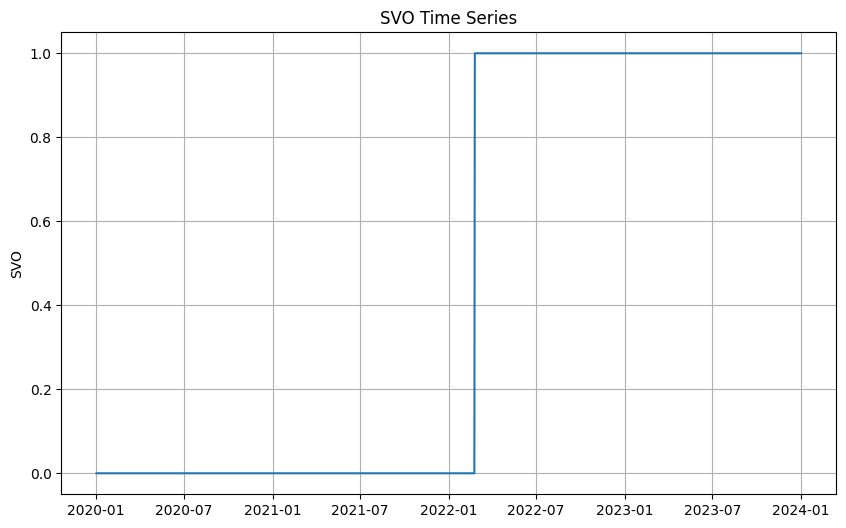

SVO: None


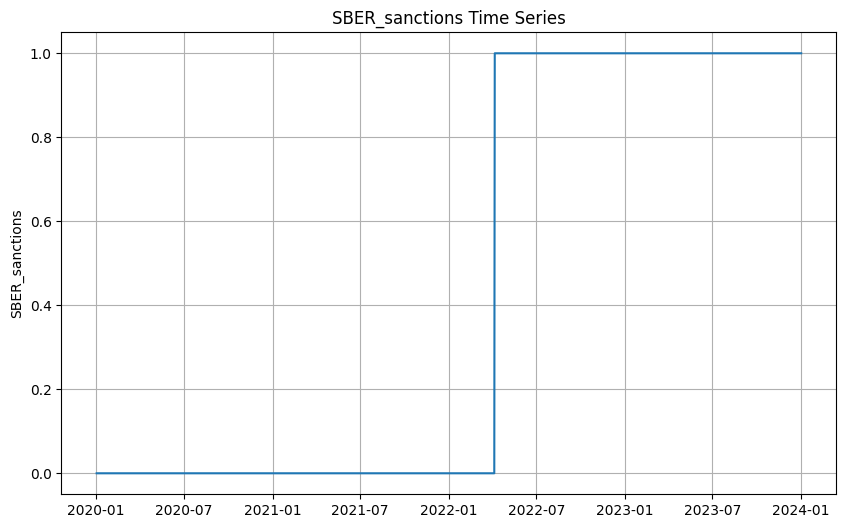

SBER_sanctions: None


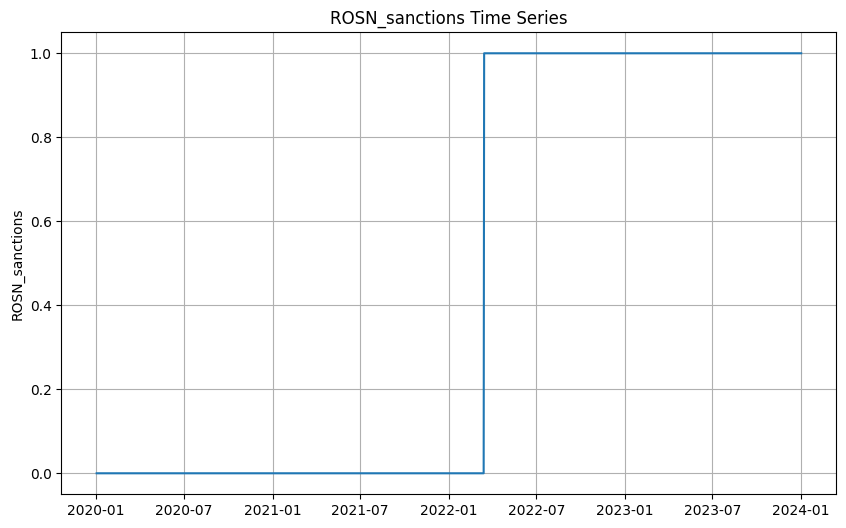

ROSN_sanctions: None


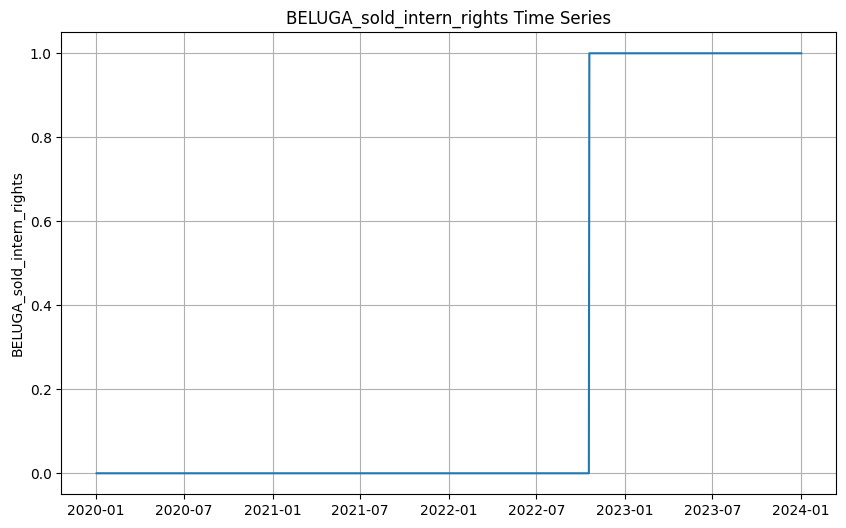

BELUGA_sold_intern_rights: None


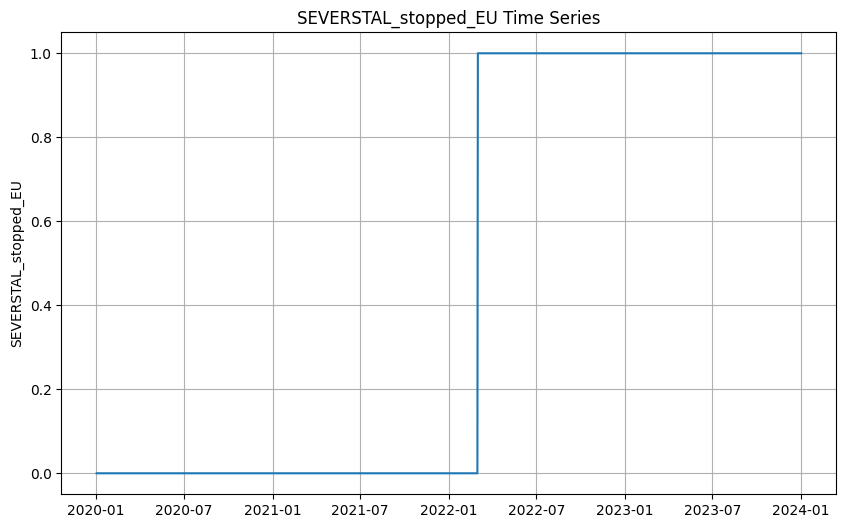

SEVERSTAL_stopped_EU: None


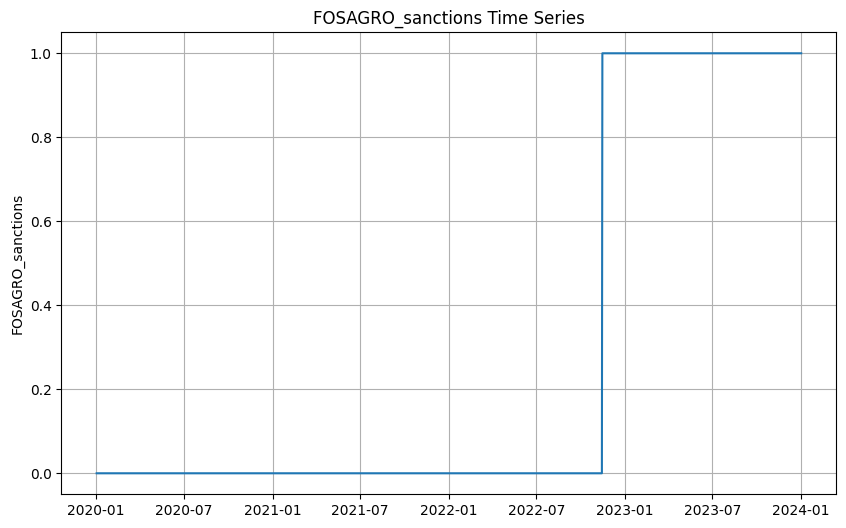

FOSAGRO_sanctions: None


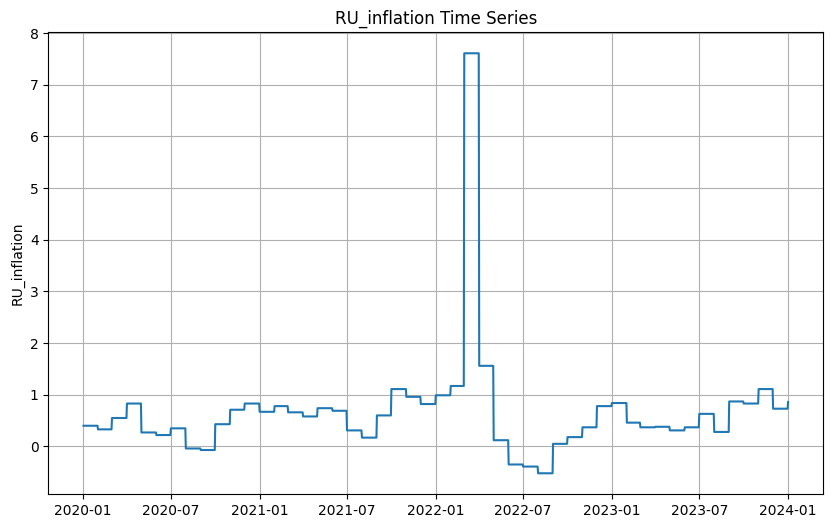

RU_inflation: None


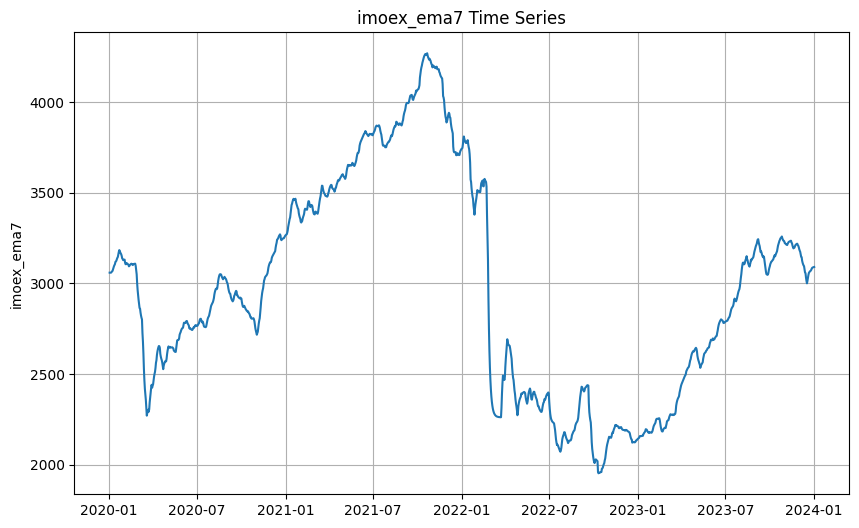

imoex_ema7: None


In [31]:
for risk_column, risk_name in [(exog[column], column) for column in exog.columns]:
    # Additive Decomposition
    risk_column.index = pd.to_datetime(risk_column.index)
    print(f"{risk_name}: {analyze_time_series(risk_column, risk_name)}")

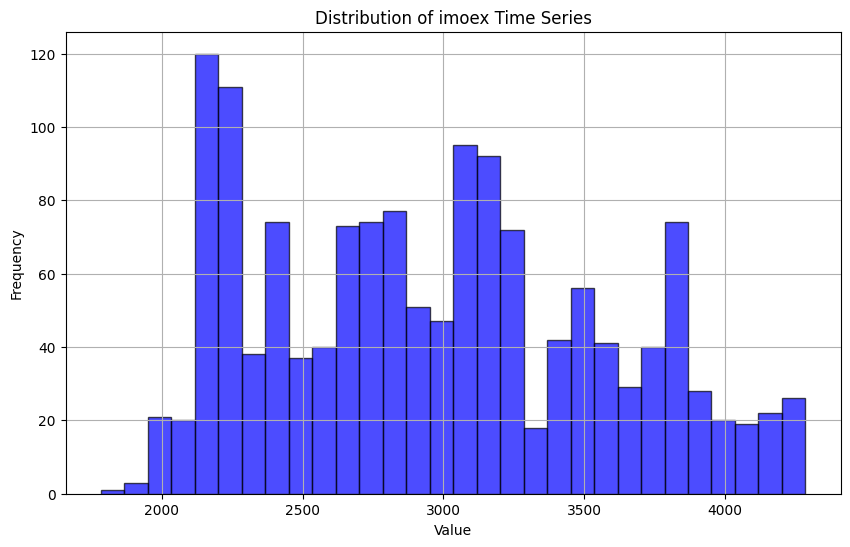

imoex: {'mean': 2965.829594346338, 'std_dev': 601.166281692387, 'median': 2929.379883, 'q1': 2424.699951, 'q3': 3420.120117, 'min': 1783.660034, 'max': 4284.910156}


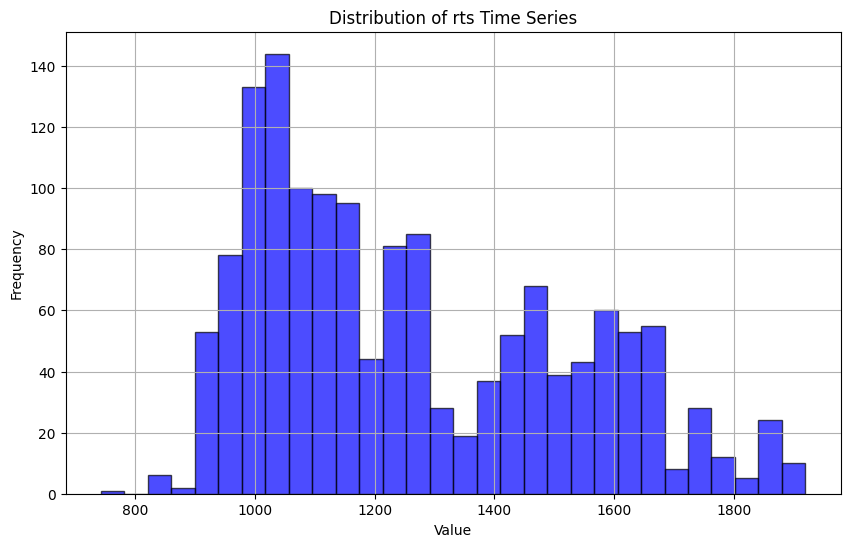

rts: {'mean': 1262.3921902806298, 'std_dev': 257.19457021898984, 'median': 1188.91, 'q1': 1046.79, 'q3': 1468.14, 'min': 742.91, 'max': 1919.58}


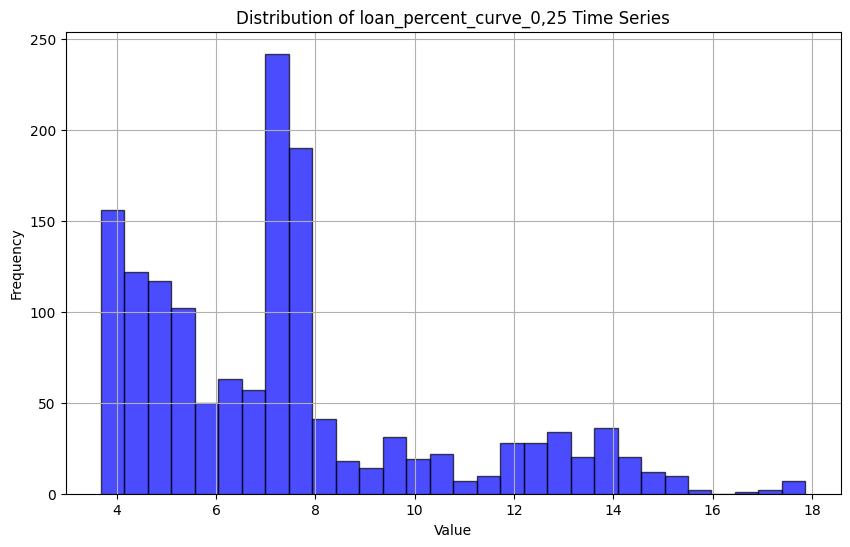

loan_percent_curve_0,25: {'mean': 7.380061601642711, 'std_dev': 3.0017777032559025, 'median': 7.15, 'q1': 5.01, 'q3': 7.92, 'min': 3.68, 'max': 17.87}


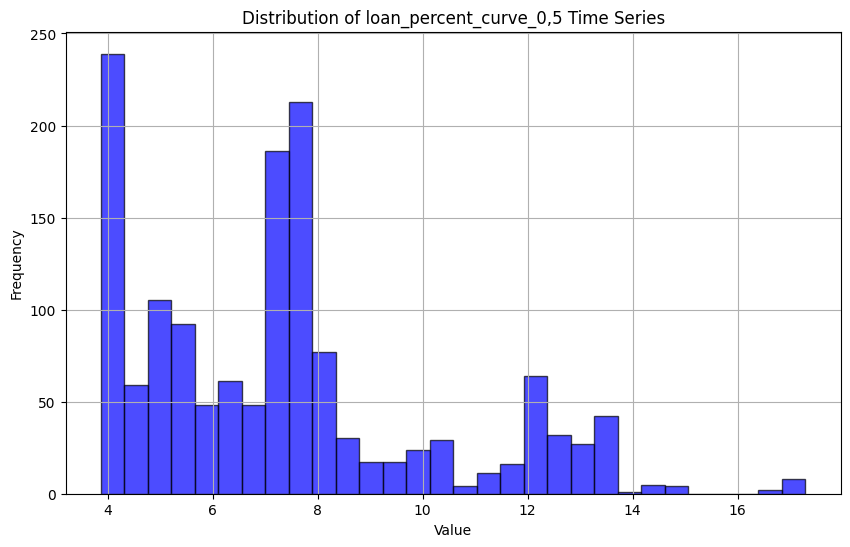

loan_percent_curve_0,5: {'mean': 7.364743326488706, 'std_dev': 2.808691674748158, 'median': 7.22, 'q1': 5.08, 'q3': 8.16, 'min': 3.87, 'max': 17.29}


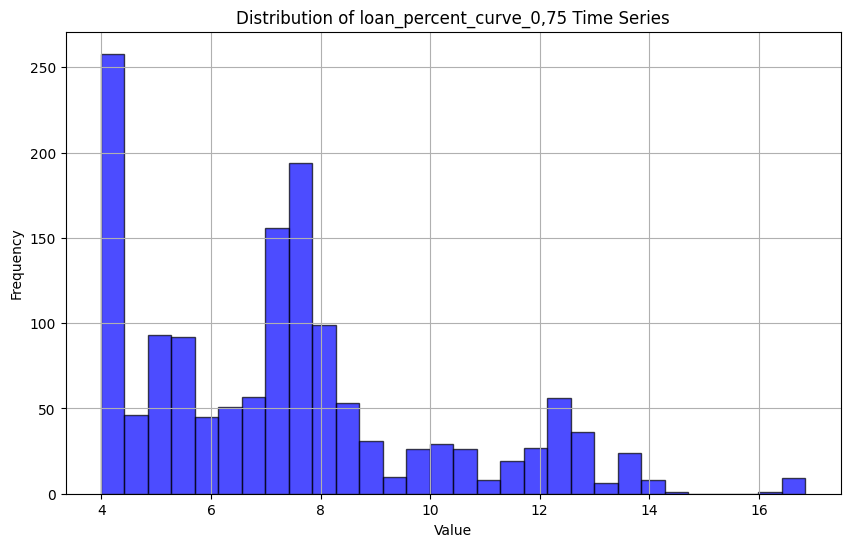

loan_percent_curve_0,75: {'mean': 7.387898699520877, 'std_dev': 2.6979941114367954, 'median': 7.31, 'q1': 5.17, 'q3': 8.32, 'min': 3.99, 'max': 16.85}


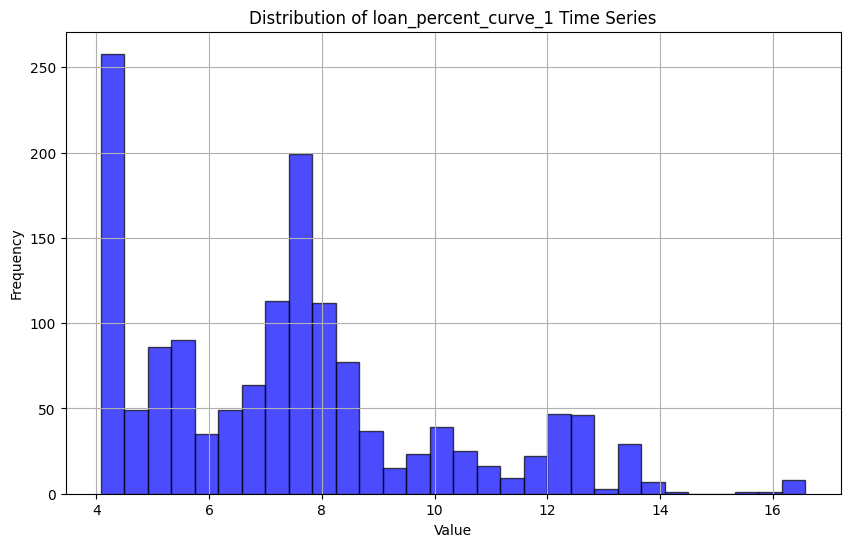

loan_percent_curve_1: {'mean': 7.429719370294319, 'std_dev': 2.623758908818412, 'median': 7.4, 'q1': 5.26, 'q3': 8.44, 'min': 4.08, 'max': 16.58}


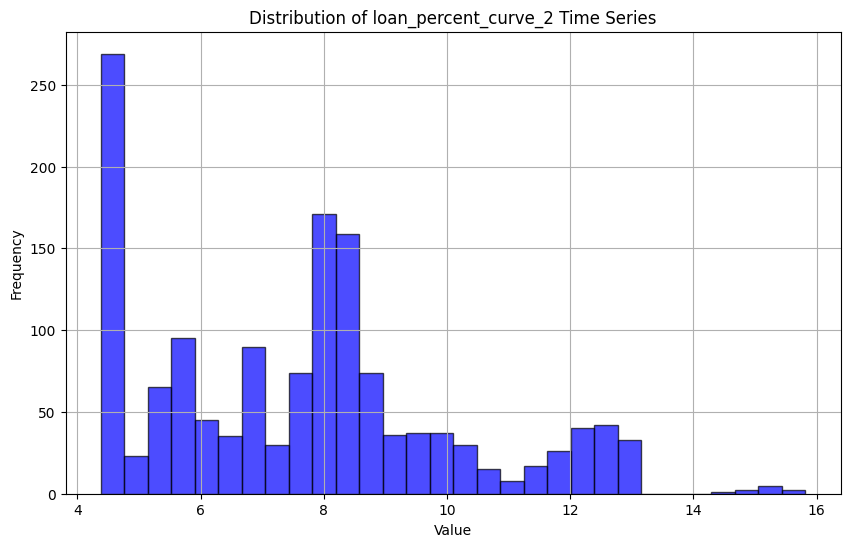

loan_percent_curve_2: {'mean': 7.652053388090349, 'std_dev': 2.4480295458637205, 'median': 7.84, 'q1': 5.54, 'q3': 8.74, 'min': 4.38, 'max': 15.82}


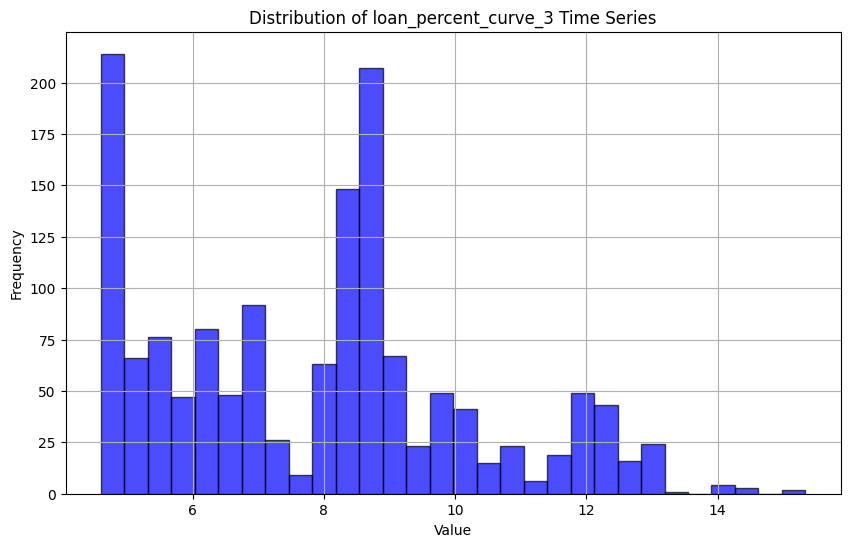

loan_percent_curve_3: {'mean': 7.871060917180013, 'std_dev': 2.3458321325772142, 'median': 8.27, 'q1': 5.7, 'q3': 8.95, 'min': 4.6, 'max': 15.34}


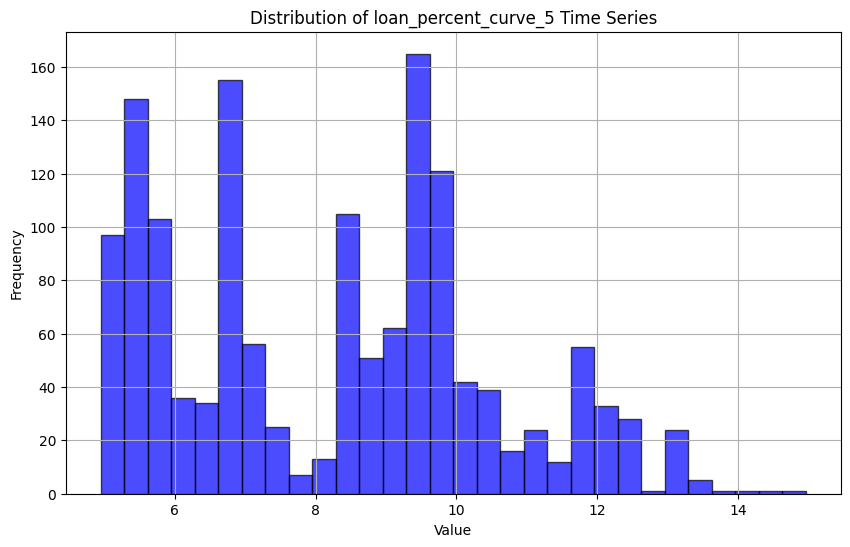

loan_percent_curve_5: {'mean': 8.239719370294319, 'std_dev': 2.2458848799071975, 'median': 8.48, 'q1': 6.1, 'q3': 9.67, 'min': 4.95, 'max': 14.96}


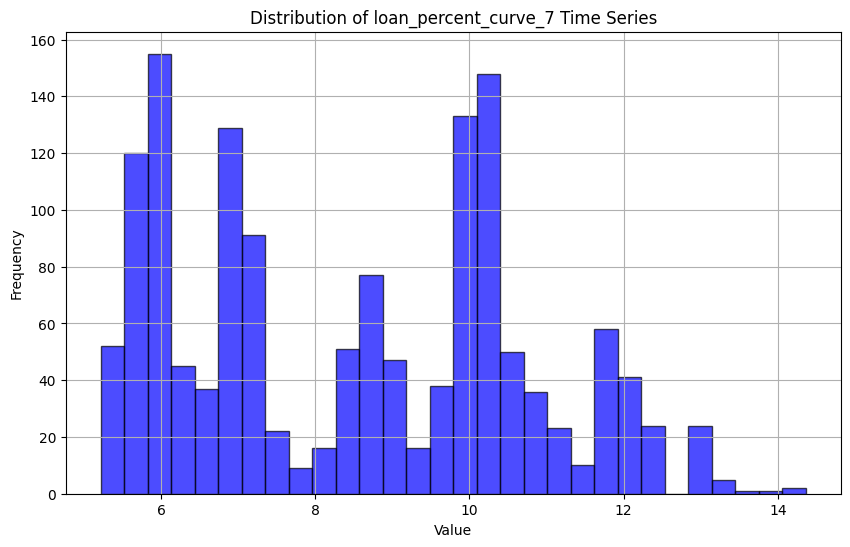

loan_percent_curve_7: {'mean': 8.494948665297741, 'std_dev': 2.194363096219009, 'median': 8.6, 'q1': 6.37, 'q3': 10.27, 'min': 5.22, 'max': 14.36}


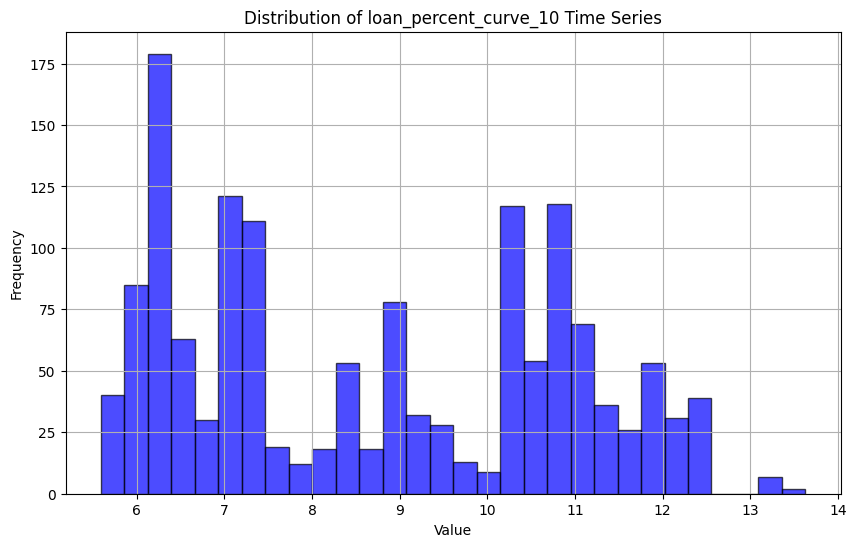

loan_percent_curve_10: {'mean': 8.719753593429157, 'std_dev': 2.130168639425738, 'median': 8.52, 'q1': 6.63, 'q3': 10.78, 'min': 5.59, 'max': 13.63}


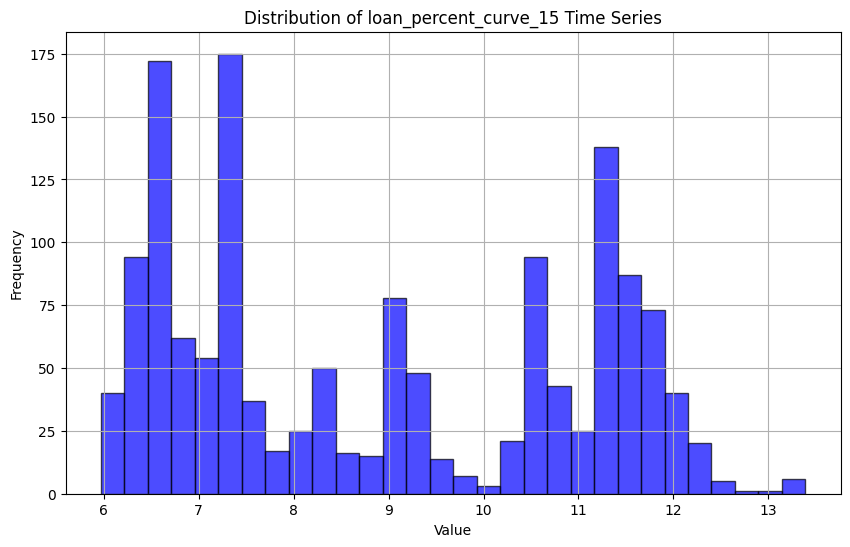

loan_percent_curve_15: {'mean': 8.906748802190279, 'std_dev': 2.0701199185717236, 'median': 8.47, 'q1': 6.94, 'q3': 11.17, 'min': 5.97, 'max': 13.39}


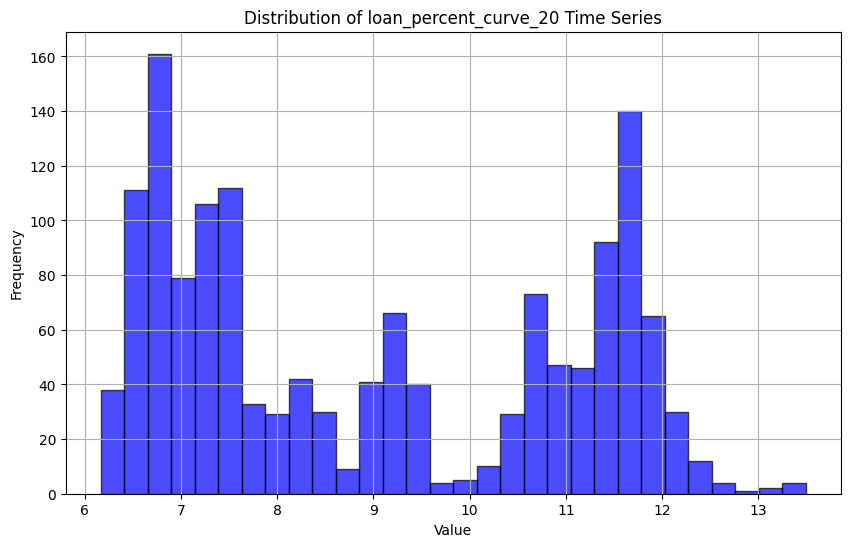

loan_percent_curve_20: {'mean': 9.002628336755647, 'std_dev': 2.042369948105021, 'median': 8.46, 'q1': 7.08, 'q3': 11.21, 'min': 6.17, 'max': 13.49}


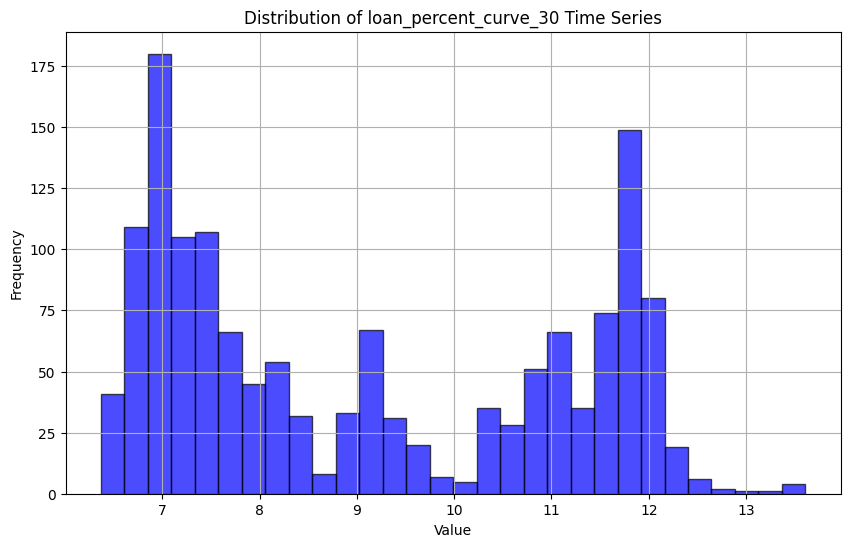

loan_percent_curve_30: {'mean': 9.102409308692677, 'std_dev': 2.023651609119359, 'median': 8.46, 'q1': 7.17, 'q3': 11.22, 'min': 6.37, 'max': 13.61}


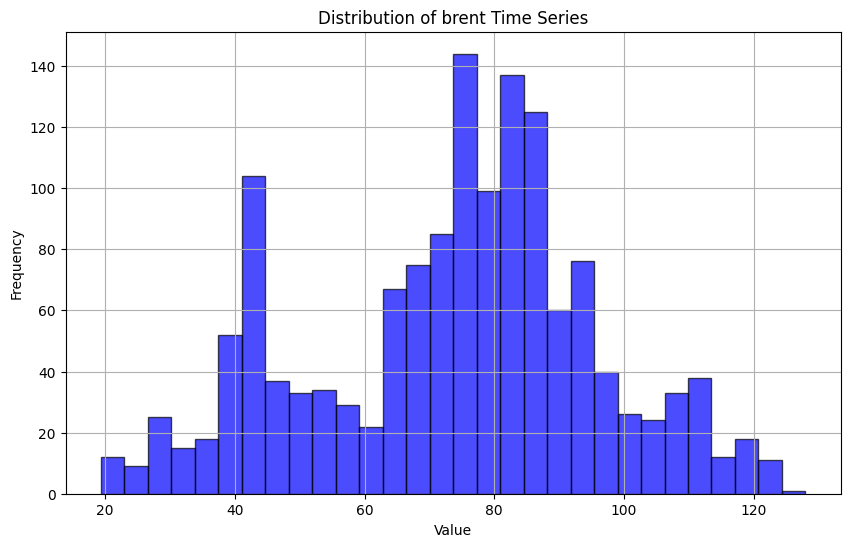

brent: {'mean': 73.74153319644081, 'std_dev': 22.18616654284549, 'median': 76.55, 'q1': 58.46, 'q3': 86.66, 'min': 19.33, 'max': 127.98}


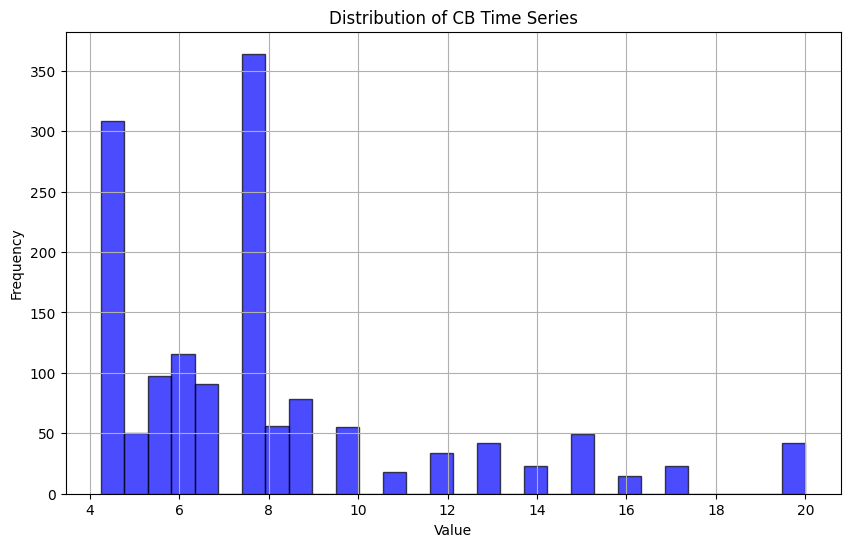

CB: {'mean': 7.844798083504449, 'std_dev': 3.693663165350195, 'median': 7.5, 'q1': 5.5, 'q3': 8.5, 'min': 4.25, 'max': 20.0}


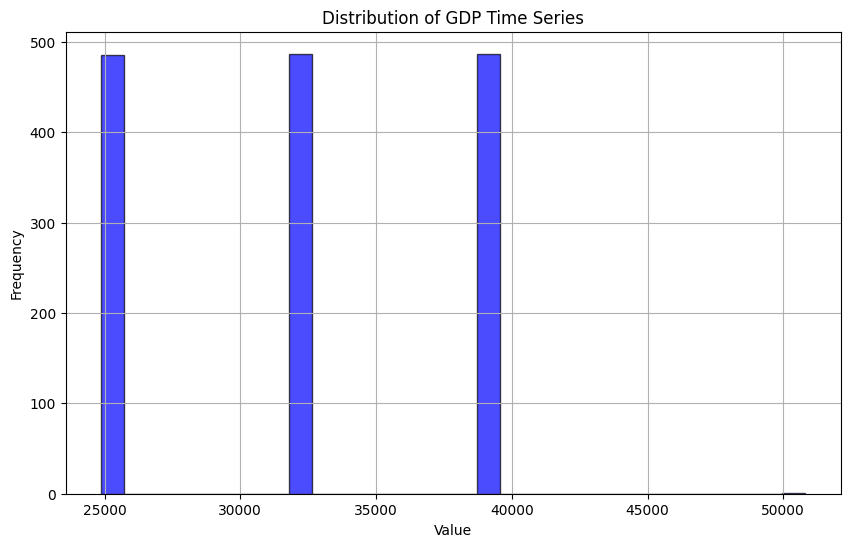

GDP: {'mean': 31902.227656122035, 'std_dev': 5694.327294735764, 'median': 32025.740824728775, 'q1': 24865.95806735806, 'q3': 38761.70176453476, 'min': 24865.95806735806, 'max': 50814.44388693543}


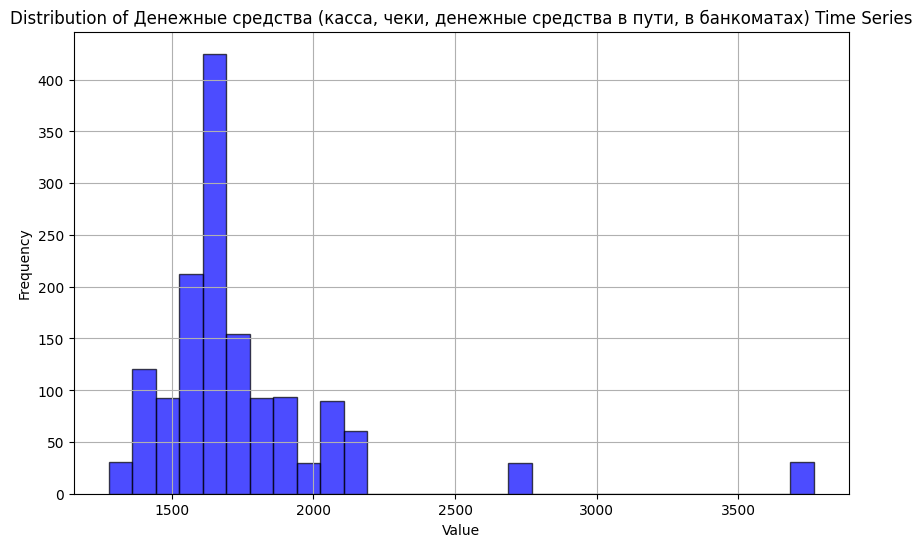

Денежные средства (касса, чеки, денежные средства в пути, в банкоматах): {'mean': 1754.4165716728266, 'std_dev': 384.5346829019821, 'median': 1666.197732, 'q1': 1593.697288, 'q3': 1825.538821, 'min': 1277.80485, 'max': 3765.667825}


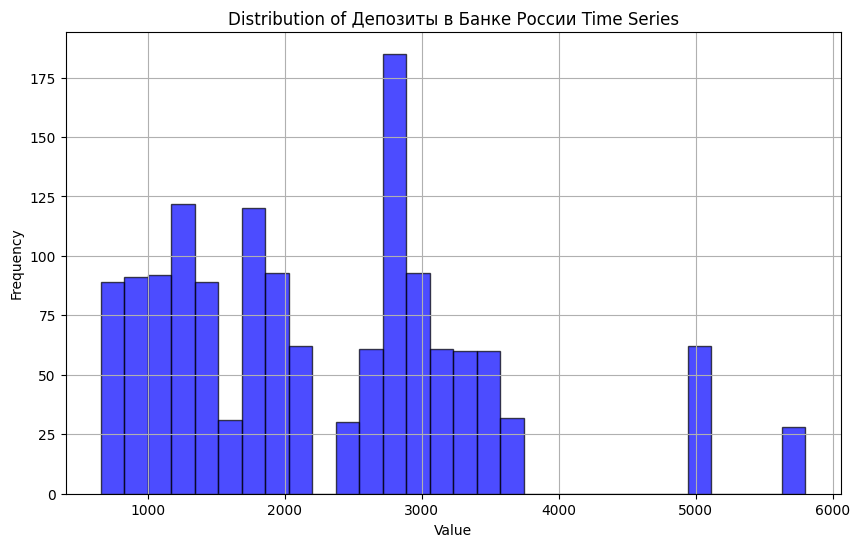

Депозиты в Банке России: {'mean': 2266.59672386653, 'std_dev': 1151.5830680207982, 'median': 2060.485554, 'q1': 1314.228247, 'q3': 2889.491036, 'min': 659.228784, 'max': 5801.200251}


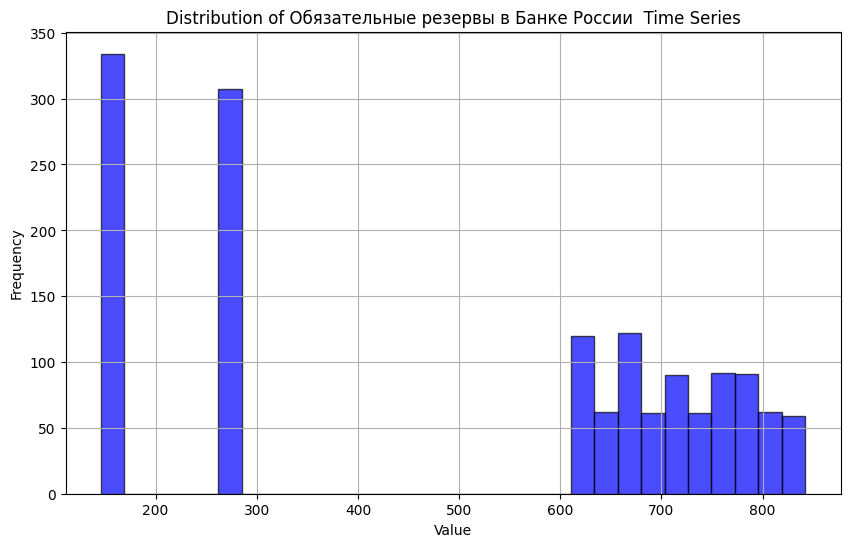

Обязательные резервы в Банке России : {'mean': 494.0267846187543, 'std_dev': 262.94014802959623, 'median': 617.088447, 'q1': 265.378752, 'q3': 721.250055, 'min': 145.922338, 'max': 842.261001}


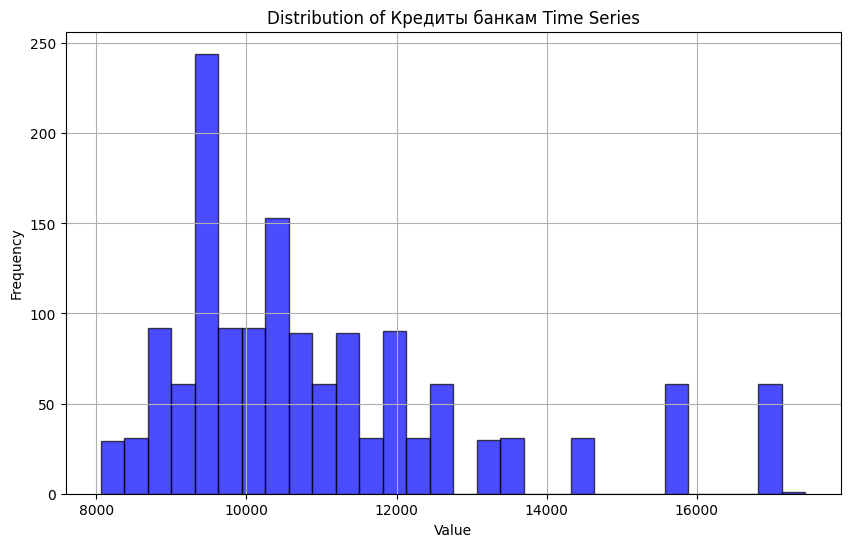

Кредиты банкам: {'mean': 11057.667268516085, 'std_dev': 2106.6529392876464, 'median': 10497.854616, 'q1': 9530.964036, 'q3': 12044.403755, 'min': 8060.343396, 'max': 17448.776129}


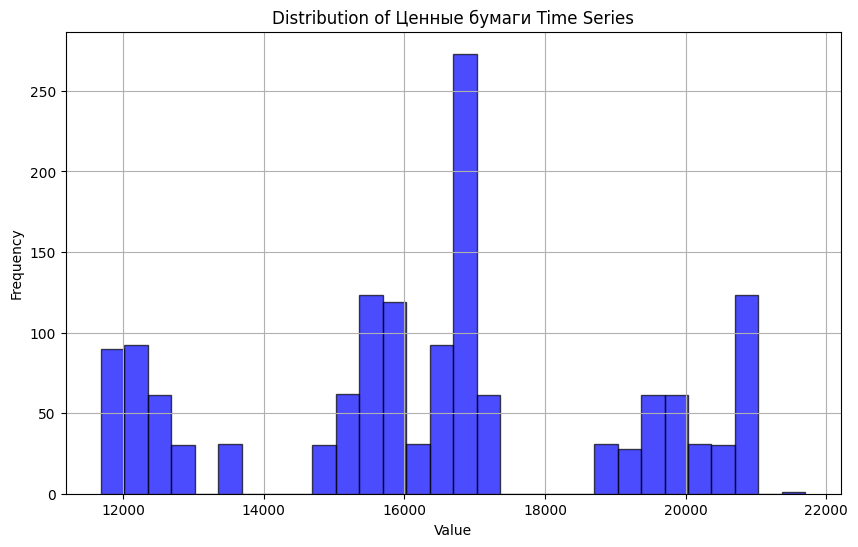

Ценные бумаги: {'mean': 16408.463233909653, 'std_dev': 2705.4628477141064, 'median': 16663.408734, 'q1': 15357.188773, 'q3': 19020.43882, 'min': 11685.254149, 'max': 21703.011748}


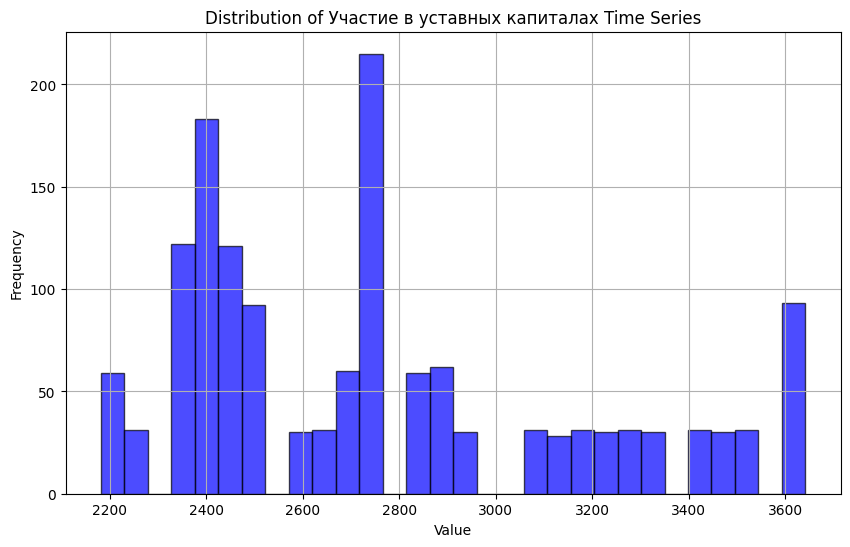

Участие в уставных капиталах: {'mean': 2760.9873475462014, 'std_dev': 409.24338747460314, 'median': 2717.159954, 'q1': 2424.276351, 'q3': 3101.978872, 'min': 2181.178922, 'max': 3642.316692}


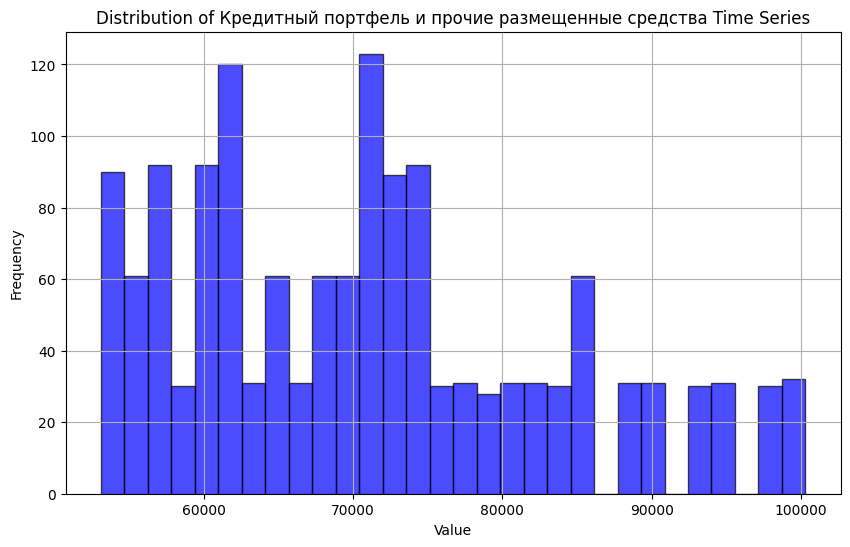

Кредитный портфель и прочие размещенные средства: {'mean': 70941.24813616564, 'std_dev': 12222.637771162816, 'median': 70645.001373, 'q1': 61116.954042, 'q3': 79708.727761, 'min': 53128.361288, 'max': 100284.650412}


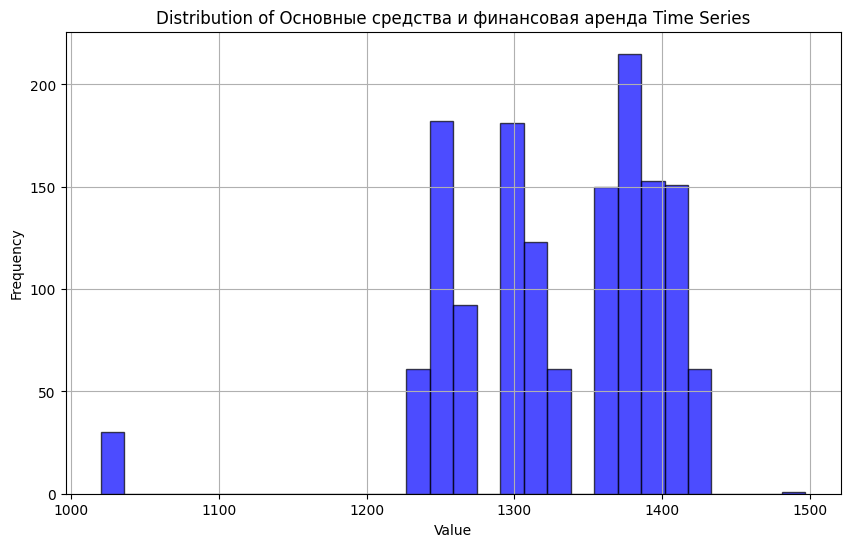

Основные средства и финансовая аренда: {'mean': 1330.461456403833, 'std_dev': 73.48344861321058, 'median': 1363.000161, 'q1': 1295.868463, 'q3': 1394.957399, 'min': 1020.425022, 'max': 1496.662346}


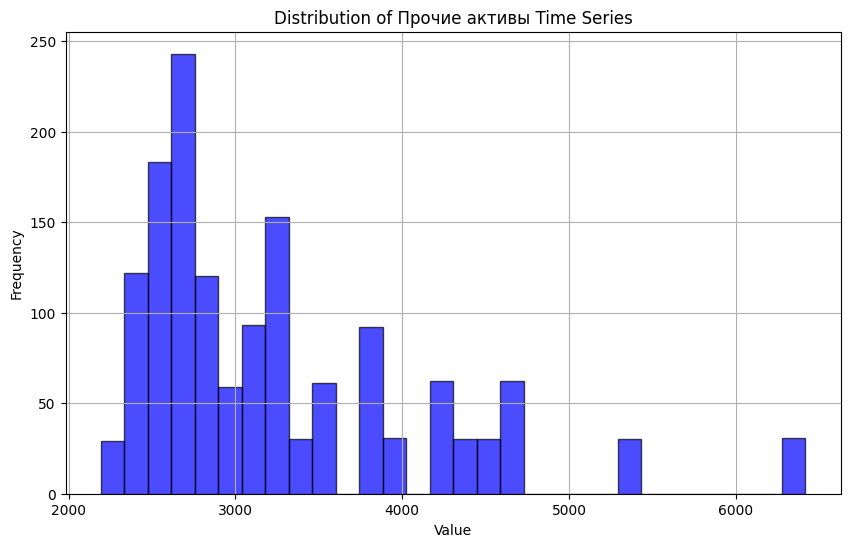

Прочие активы: {'mean': 3246.3259530574946, 'std_dev': 862.1745750139241, 'median': 2998.278679, 'q1': 2638.19318, 'q3': 3814.704513, 'min': 2193.807058, 'max': 6415.860375}


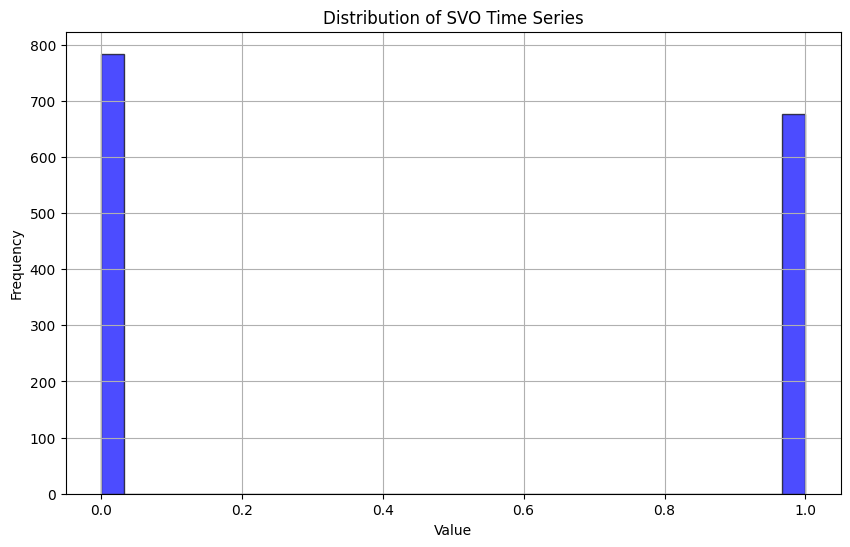

SVO: {'mean': 0.46338124572210815, 'std_dev': 0.49882800769851976, 'median': 0.0, 'q1': 0.0, 'q3': 1.0, 'min': 0.0, 'max': 1.0}


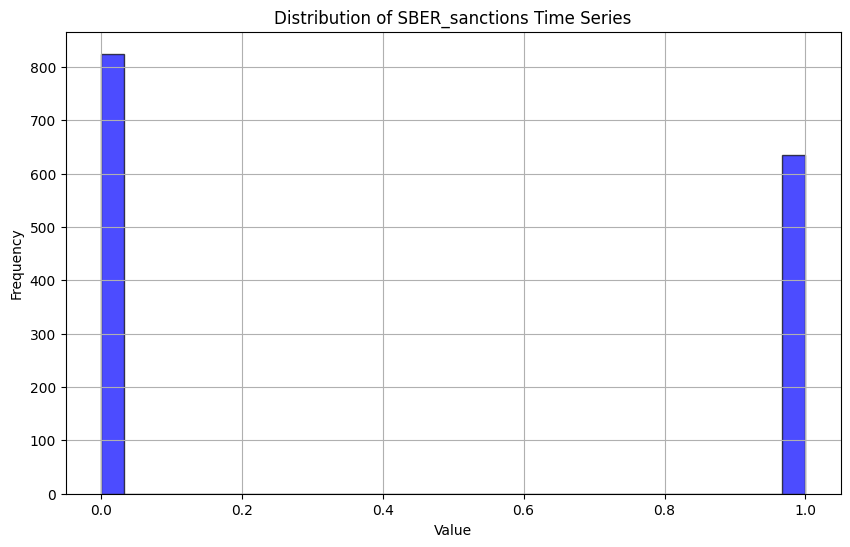

SBER_sanctions: {'mean': 0.4353182751540041, 'std_dev': 0.4959683878859905, 'median': 0.0, 'q1': 0.0, 'q3': 1.0, 'min': 0.0, 'max': 1.0}


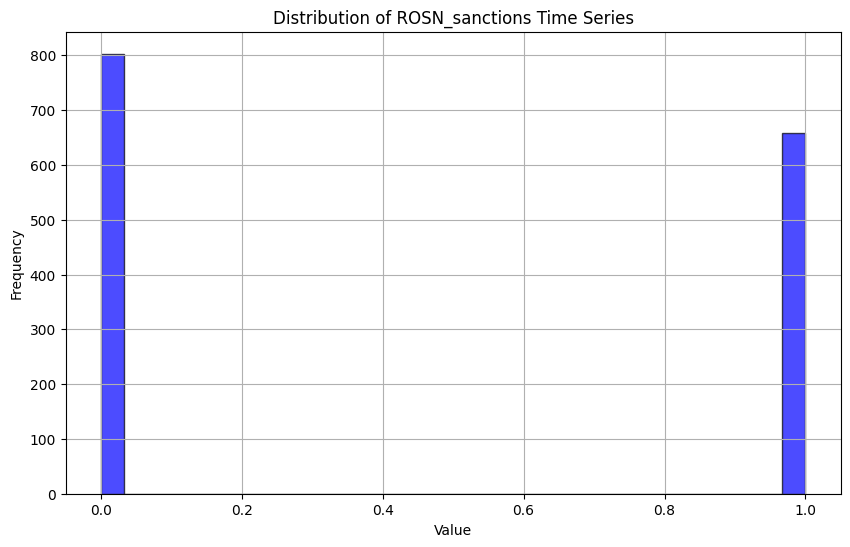

ROSN_sanctions: {'mean': 0.45037645448323066, 'std_dev': 0.4977017680958918, 'median': 0.0, 'q1': 0.0, 'q3': 1.0, 'min': 0.0, 'max': 1.0}


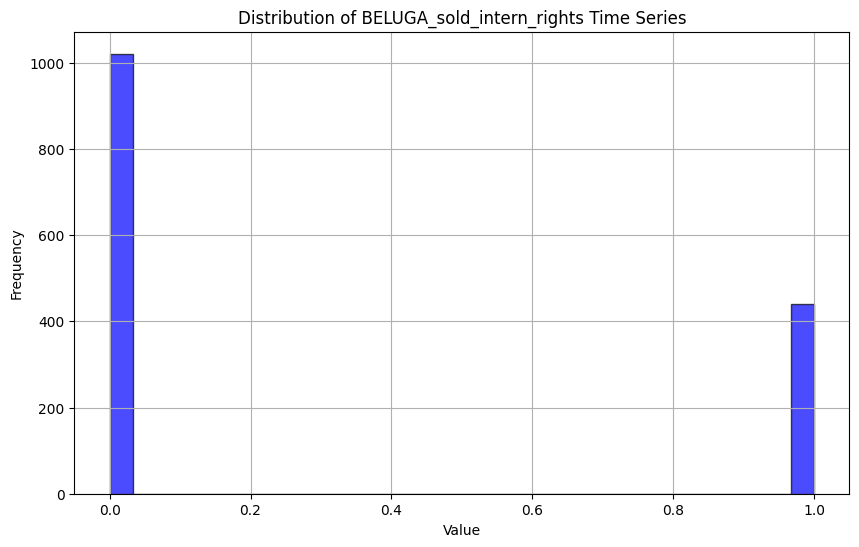

BELUGA_sold_intern_rights: {'mean': 0.30116358658453113, 'std_dev': 0.45892072755542895, 'median': 0.0, 'q1': 0.0, 'q3': 1.0, 'min': 0.0, 'max': 1.0}


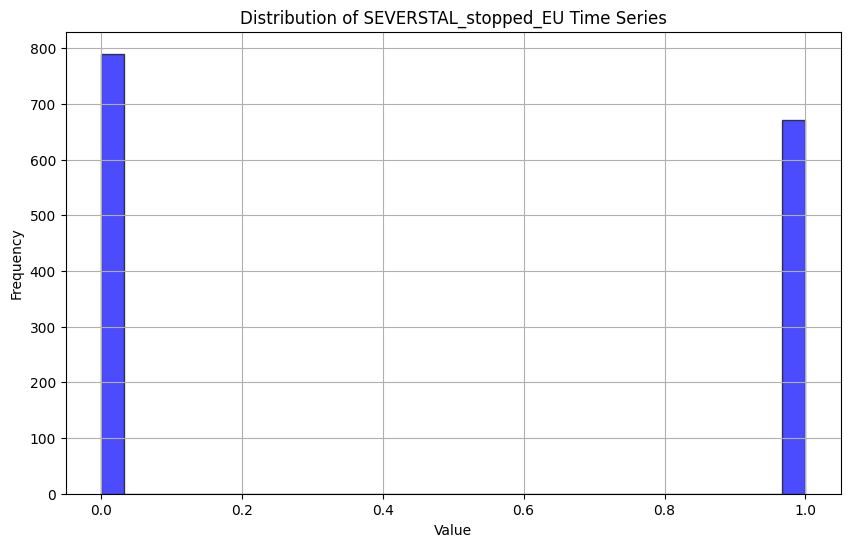

SEVERSTAL_stopped_EU: {'mean': 0.45927446954141, 'std_dev': 0.4985093058705425, 'median': 0.0, 'q1': 0.0, 'q3': 1.0, 'min': 0.0, 'max': 1.0}


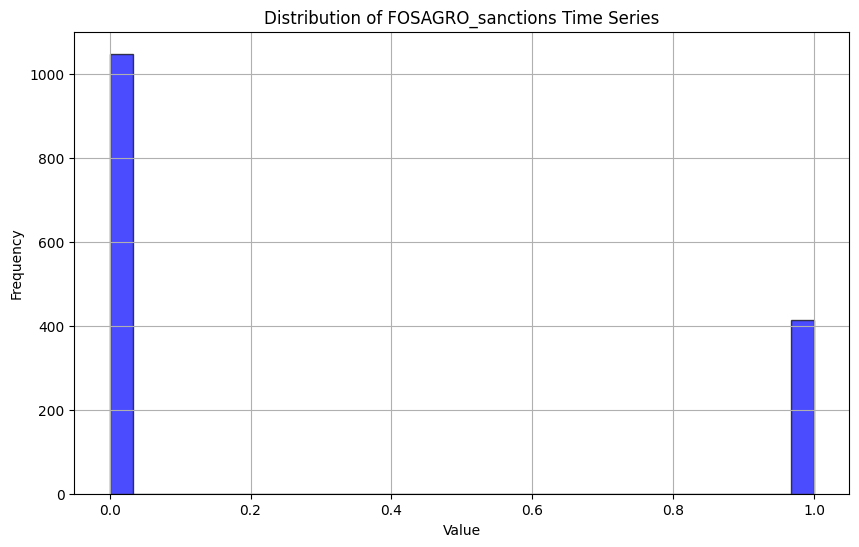

FOSAGRO_sanctions: {'mean': 0.28268309377138945, 'std_dev': 0.45045782059122014, 'median': 0.0, 'q1': 0.0, 'q3': 1.0, 'min': 0.0, 'max': 1.0}


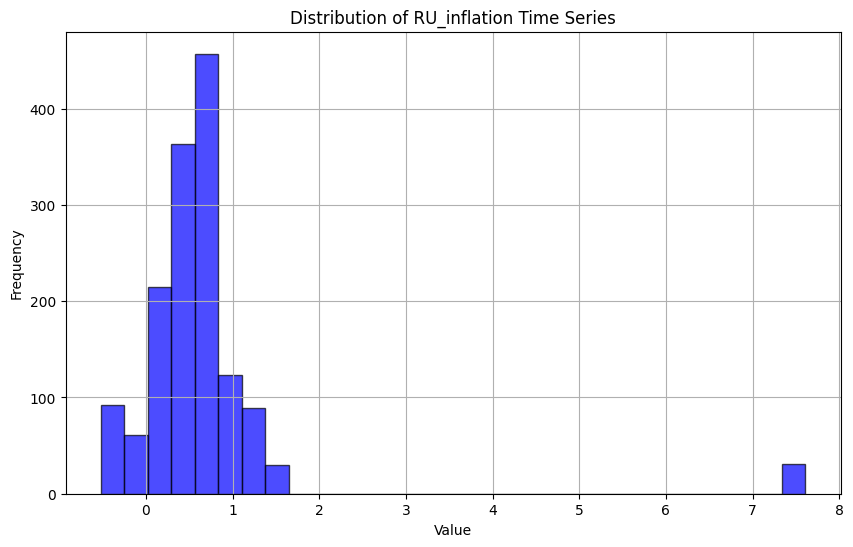

RU_inflation: {'mean': 0.6603969883641341, 'std_dev': 1.1018822531589028, 'median': 0.55, 'q1': 0.28, 'q3': 0.82, 'min': -0.52, 'max': 7.61}


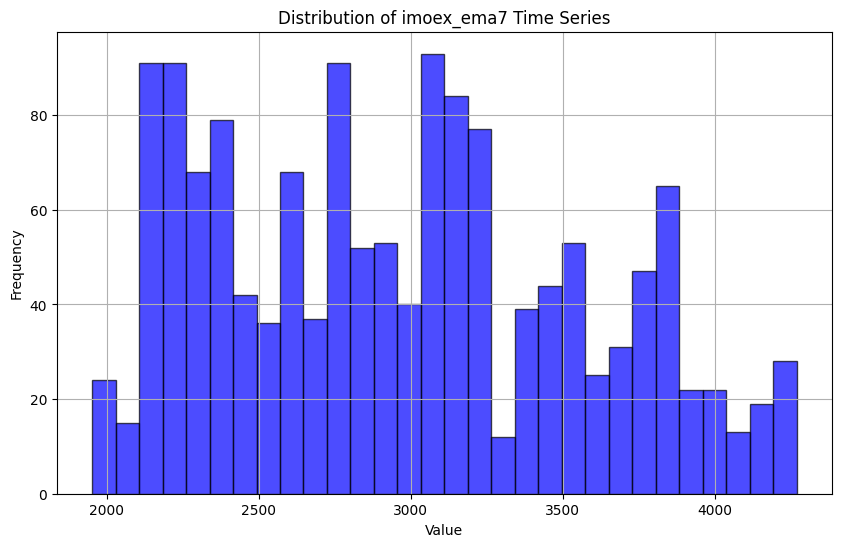

imoex_ema7: {'mean': 2965.7650338886183, 'std_dev': 598.1496667466666, 'median': 2930.437455547813, 'q1': 2413.0018112589246, 'q3': 3426.4116860507693, 'min': 1952.57754062198, 'max': 4269.433054670205}


In [41]:
for risk_column, risk_name in [(exog[column], column) for column in exog.columns]:
    # Additive Decomposition
    analyze_time_series(risk_column, risk_name)

<img src="image-20240611-212448.png" width="" align="" />

In [42]:
#  for target_column, target_name in [(merged_df[column], column) for column in columns_to_models.keys()]:
#     tsplot(target_column, target_name, lags = 60)

In [43]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# %matplotlib inline 

# for target_column, target_name in [(merged_df[column], column) for column in columns_to_models.keys()]:
#     # Additive Decomposition
#     result_add = seasonal_decompose(target_column, model='additive', extrapolate_trend='freq')

#     # Plot
#     plt.rcParams.update({'figure.figsize': (10,10)})
#     fig = result_add.plot()
 

In [44]:
# differenced_df = pd.DataFrame()

# # Цикл для дифференцирования временных рядов
# for column in columns_to_models.keys():
#     differenced_series = merged_df[column].diff().dropna()
#     differenced_df[column] = differenced_series


<img src="image-20240611-212448.png" width="" align="" />

In [45]:
# differenced_df = pd.DataFrame()

# # Цикл для дифференцирования временных рядов
# for column in columns_to_models.keys():
#     differenced_series = merged_df[column].diff().dropna()
#     differenced_df[column] = differenced_series
 
# for target_column, target_name in [(differenced_df[column], column) for column in columns_to_models.keys()]:
#     tsplot(target_column, target_name, lags = 30)

In [46]:
# columns_to_subexog = {}

# from sklearn.feature_selection import mutual_info_regression

# for target in columns_to_models.keys():
#     # Calculate mutual information and get top num_features
#     sorted_cols = exog.columns[np.argsort(mutual_info_regression(exog.loc[differenced_df.index], differenced_df[target]))]
#     best_cols = sorted_cols[-num_features:]
#     columns_to_subexog[target] = exog.loc[differenced_df.index, best_cols]

# for target_name, exog in columns_to_subexog.items():
#     assert len(differenced_df) == len(exog), f"{len(differenced_df)} != {len(exog)}"

In [47]:
# %matplotlib inline 
# from statsmodels.tsa.seasonal import seasonal_decompose


# for target_column, target_name in [(differenced_df[column], column) for column in columns_to_models.keys()]:
#     # Additive Decomposition
#     result_add = seasonal_decompose(target_column, model='additive', extrapolate_trend='freq')

#     # Plot
#     plt.rcParams.update({'figure.figsize': (10,10)})
#     fig = result_add.plot()

In [48]:
# differenced_df_spec = pd.DataFrame()

# # Цикл для дифференцирования временных рядов
# for column in ['USD', 'EUR']:
#     differenced_series = merged_df[column].diff(7).dropna()
#     differenced_df_spec[column + '_7'] = differenced_series
#     differenced_series = merged_df[column].diff(24).dropna()
#     differenced_df_spec[column + '_24'] = differenced_series
 
# for target_column, target_name in [(differenced_df_spec[column], column) for column in ['USD_7', 'EUR_7','USD_24', 'EUR_24']]:
#     tsplot(target_column, target_name, lags = 30)

In [49]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# for target_column, target_name in [(differenced_df_spec[column], column) for column in ['USD_7', 'EUR_7']]:
#     # Additive Decomposition
#     result_add = seasonal_decompose(target_column, model='additive', extrapolate_trend='freq')

#     # Plot
#     plt.rcParams.update({'figure.figsize': (10,10)})
#     fig = result_add.plot()

In [50]:
columns_to_params['CLOSE_SU26218RMFS6'] = [0], [0], range(3), [0], [0], [0], [0]
columns_to_params['CLOSE_SU26219RMFS4'] = [0], [0], range(3), [0], [0], [0], [0]
columns_to_params['CLOSE_SU26222RMFS8'] = [0], range(2), range(4), [0], [0], [0], [0]
columns_to_params['CLOSE_SU26227RMFS7'] = [0], [0], range(4), [0], [0], [0], [0]
columns_to_params['CLOSE_SU26229RMFS3'] = [0], [0], range(4), [0], [0], [0], [0]

columns_to_params['SBER'] = [0], [0], range(2), [0], [0], [0], [0]
columns_to_params['PIKK'] = [0], [0], range(4), [0], [0], [0], [0]
columns_to_params['ROSN'] = [0], [0], range(4), [0], [0], [0], [0]
columns_to_params['BELU'] = [0], [0], range(4), [0], [0], [0], [0]
columns_to_params['MGNT'] = [0], [0], range(4), [0], [0], [0], [0]
columns_to_params['KROT'] = [0], [0], range(4), [0], [0], [0], [0]
columns_to_params['CHMF'] = [0], [0], range(4), [0], [0], [0], [0]
columns_to_params['NVTK'] = [0], [0], range(4), [0], [0], [0], [0]
columns_to_params['PHOR'] = [0], [0], range(4), [0], [0], [0], [0]
columns_to_params['NLMK'] = [0], [0], range(4), [0], [0], [0], [0]
columns_to_params['USD'] = range(3), range(2), range(3), range(3), range(2), range(3), [10]
columns_to_params['EUR'] = [0], [0], range(3), range(0,8), range(2), range(2), [0]

# Подбираем SARIMAX под каждый таргет

In [51]:
!pip install statsmodels==0.14.2

In [52]:
# import warnings
# import statsmodels.api as sm
# import itertools
# from tqdm import tqdm
# import math
# import pandas as pd
# from sklearn.metrics import mean_absolute_error, r2_score
# import numpy as np

# # Disable warnings for clearer output
# warnings.filterwarnings("ignore")

# # Initialize the dictionary to store SARIMAX models
# sarimax_models = {}

# start_date = '2020-02-01'
# threshold_date = '2021-07-01'
# end_date = '2021-10-01'

# # Function to ensure the data is in the correct format
# def ensure_numeric(df):
#     df = df.apply(pd.to_numeric, errors='coerce')
#     df = df.dropna()
#     return df

# # Define your optimize function
# def optimize(p_values, d_values, q_values, 
#              P_values, D_values, Q_values, m_values, 
#              target, exog, 
#              start_date, threshold_date, end_date,
#              target_name=None, verbose=True):
#     # Ensure data is numeric
#     target = ensure_numeric(target)
#     if exog is not None:
#         exog = ensure_numeric(exog)
    
#     # Check index is DatetimeIndex
#     if not isinstance(target.index, pd.DatetimeIndex):
#         target.index = pd.to_datetime(target.index)
#     if exog is not None and not isinstance(exog.index, pd.DatetimeIndex):
#         exog.index = pd.to_datetime(exog.index)

#     target = target.astype(float)
#     for column in exog.columns: exog[column] = exog[column].astype(float)

#     # Create all possible combinations of SARIMA parameters
#     param_combinations = list(itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values, m_values))
#     results_exog = []

#     mask_before = (target.index < threshold_date) & (target.index >= start_date)
#     mask_after = (target.index >= threshold_date) & (target.index <= end_date)

#     # Initialize AIC with a large value
#     best_aic_SARIMA = float("inf")
#     best_params_SARIMA = None
#     best_SARIMA = None

#     warnings.filterwarnings('ignore')

#     # Perform grid search
#     for params in tqdm(param_combinations):
#         params = np.array(params).astype(float)
#         order = params[:3]
#         seasonal_order = params[3:]

#         try:
#             model_chosen = sm.tsa.statespace.SARIMAX(endog=target[mask_before], exog=exog[mask_before] if exog is not None else None, order=order, seasonal_order=seasonal_order)
#             model_chosen = model_chosen.fit(disp=False)
#             aic = model_chosen.aic

#             # Ensure the convergence of the model
#             if not math.isinf(model_chosen.zvalues.mean()):
#                 predict = model_chosen.predict(start=threshold_date, end=end_date, exog=exog[mask_after] if exog is not None else None)
#                 err_max = (target[mask_after] - predict).abs().max()
#                 mae = mean_absolute_error(target[mask_after], predict)
#                 llf = model_chosen.llf
#                 r2 = r2_score(target[mask_after], predict)
#                 aic = model_chosen.aic

#                 if aic < best_aic_SARIMA:
#                     best_aic_SARIMA = aic
#                     best_params_SARIMA = list(params)
#                     best_SARIMA = model_chosen
#                     best_err_max = err_max
#                     best_mae = mae
#                     best_llf = llf
#                     best_r2 = r2
#                     best_combination = params

#                 results_exog.append(list(params[:-1]) + [err_max, mae, llf, r2, aic])
#             else:
#                 print(order, seasonal_order, 'not converged')
#         except ValueError as e:
#             print(f'ValueError for parameters {params}: {e}')
#             continue
#         except Exception as e:
#             print(f'Exception for parameters {params}: {e}')
#             continue
#     if None not in (target_name, best_params_SARIMA):
#         # Print the best parameters and AIC
#         print(f"\n[{target_name}] Best Parameters:", best_params_SARIMA)
#         print(f"[{target_name}] Best AIC:", best_aic_SARIMA)

#         result_table = pd.DataFrame(results_exog)
#         result_table.columns = ['p', 'd', 'q', 'P', 'D', 'Q', 'err_max', 'MAE', 'LLF', 'R2', 'aic']
#         print(f"[{target_name}] by LLF:")
#         display(result_table.sort_values(by=['LLF'], ascending=False).head(1))

#         if verbose:
#             print(f"[{target_name}] by err_max:")
#             display(result_table.sort_values(by=['err_max'], ascending=True).head(1))
#             print(f"[{target_name}] by MAE:")
#             display(result_table.sort_values(by=['MAE'], ascending=True).head(1))
#             print(f"[{target_name}] by aic:")
#             display(result_table.sort_values(by=['aic'], ascending=True).head(1))
#             print(f"[{target_name}] by R2:")
#             display(result_table.sort_values(by=['R2'], ascending=False).head(1))

#     if best_SARIMA is not None:
#         return {"order": best_params_SARIMA[:3], "seasonal_order": best_params_SARIMA[3:], "model": best_SARIMA}
#     else:
#         return None

# # Loop through each column to build and store the SARIMAX model
# for target_column, target_name in [(differenced_df[column], column) for column in columns_to_params.keys()]:
#     p_values, d_values, q_values, \
#     P_values, D_values, Q_values, m_values = columns_to_params[target_name]

#     result = optimize(p_values, d_values, q_values, 
#                       P_values, D_values, Q_values, m_values, 
#                       target_column, columns_to_subexog[target_name],
#                       start_date, threshold_date, end_date,
#                       target_name, verbose=False)
    
#     if result is None:
#         print(f"optimize returned None for {target_name} with parameters: {columns_to_params[target_name]}")
#     else:
#         print(result)
#         sarimax_models[target_name] = result

# # Display the SARIMAX models dictionary keys to confirm
# sarimax_models


In [53]:
!pip install pmdarima==2.0.4

In [54]:
# import warnings
# import pandas as pd
# import numpy as np
# import pmdarima as pm
# from tqdm import tqdm
# from scipy import stats

# # Disable warnings for clearer output
# warnings.filterwarnings("ignore")

# # Initialize the dictionary to store ARIMA models
# arima_models = {}

# start_date = '2020-02-01'
# threshold_date = '2021-07-01'
# end_date = '2021-10-01'

# # Function to ensure the data is in the correct format
# def ensure_numeric(df):
#     df = df.apply(pd.to_numeric, errors='coerce')
#     df = df.dropna()
#     return df

# # Function to train the model using auto_arima
# def auto_arima_model(target, exog, start_date, threshold_date, end_date, target_name=None):
#     # Ensure data is numeric
#     target = ensure_numeric(target)
#     if exog is not None:
#         exog = ensure_numeric(exog)
    
#     # Check index is DatetimeIndex
#     if not isinstance(target.index, pd.DatetimeIndex):
#         target.index = pd.to_datetime(target.index)
#     if exog is not None and not isinstance(exog.index, pd.DatetimeIndex):
#         exog.index = pd.to_datetime(exog.index)

#     target = target.astype(float)
#     if exog is not None:
#         for column in exog.columns:
#             exog[column] = exog[column].astype(float)

#     mask_before = (target.index < threshold_date) & (target.index >= start_date)
#     mask_after = (target.index >= threshold_date) & (target.index <= end_date)
#     p, d, q, P, D, Q, m = columns_to_params[target_name]
#     m = m[-1]
#     try:
#         model = pm.auto_arima(target[mask_before], exogenous=exog[mask_before] if exog is not None else None,
                              
#                               seasonal=m>0, trace=False,
#                               error_action='ignore', suppress_warnings=True, stepwise=True)

#         # Forecast
#         n_periods = len(target[mask_after])
#         forecast, conf_int = model.predict(n_periods=n_periods, exogenous=exog[mask_after] if exog is not None else None, return_conf_int=True)
        
#         err_max = (target[mask_after] - forecast).abs().max()
#         mae = mean_absolute_error(target[mask_after], forecast)
#         r2 = r2_score(target[mask_after], forecast)
#         aic = model.aic()
        
#         print(f"[{target_name}] Best Parameters: {model.order} x {model.seasonal_order}")
#         print(f"[{target_name}] AIC: {aic}, MAE: {mae}, Max Error: {err_max}, R2: {r2}")

#         return {"order": model.order, "seasonal_order": model.seasonal_order, "model": model}
    
#     except Exception as e:
#         print(f'Exception for {target_name}: {e}')
#         return None

# # Loop through each column to build and store the ARIMA model
# for target_column, target_name in [(differenced_df[column], column) for column in columns_to_params.keys()]:
#     result = auto_arima_model(target_column, columns_to_subexog[target_name],
#                               start_date, threshold_date, end_date, target_name)
    
#     if result is None:
#         print(f"auto_arima_model returned None for {target_name}")
#     else:
#         print(f"auto arima finished for {target_name}")
#         arima_models[target_name] = result

# # Display the ARIMA models dictionary keys to confirm
# arima_models


# Бустинги

In [55]:
!pip install catboost

In [56]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
%matplotlib inline  

def create_shifted_columns(df, columns, shifts):
    """
    Создает дополнительные колонки со сдвигами для указанных колонок DataFrame.
    
    Параметры:
    df (pd.DataFrame): Входной DataFrame.
    columns (list): Список названий колонок, для которых нужно сделать сдвиги.
    shifts (list): Массив целочисленных значений для сдвигов.
    
    Возвращает:
    pd.DataFrame: DataFrame с добавленными сдвигами.
    """
    df_copy = df.copy()
    
    for col in columns:
        for shift in shifts:
            new_col_name = f'{col}_shift_{shift}'
            df_copy[new_col_name] = df_copy[col].shift(shift)
    
    return df_copy

# Function to train the model using boostings
def boosting(X, y, start_date, threshold_date, end_date, target_name=None, graph=True):
    mask_before = (y.index < threshold_date) & (y.index >= start_date)
    mask_after = (y.index >= threshold_date) & (y.index <= end_date)

    X_train, y_train, X_test, y_test = X[mask_before], y[mask_before], X[mask_after], y[mask_after]
    try:
        parameters = {
            'verbose': [False],
            'depth' : [2, 3, 6,10],
            'learning_rate' : [0.01, 0.05, 0.1, 0.5],
            'iterations'    : [100, 500, 1000, 5000]
        }
        grid = GridSearchCV(
            scoring = 'neg_mean_squared_error',
            estimator=CatBoostRegressor(), 
            param_grid = parameters, 
            cv = 2, n_jobs=-1)
        model = grid.fit(X_train, y_train).best_estimator_
        pred = model.predict(X_test)
        if graph: 
            plt.plot(y_test.index, y_test, label = f"real {target_name}") 
            plt.plot(y_test.index, pred, label = f"pred {target_name}") 
            plt.legend() 
            plt.show()
        res = {"R2":r2_score(y_test, pred), "MSE": mean_squared_error(y_test, pred), "model":model}      
        return res
    
    except Exception as e:
        print(f'Exception for {target_name}: {e}')
        return None

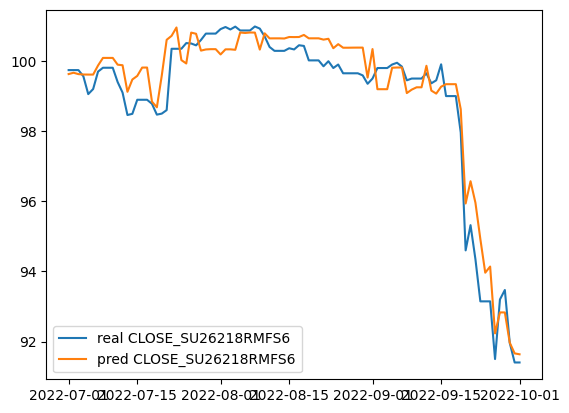

boosting finished for CLOSE_SU26218RMFS6
{'R2': 0.9326372711216094, 'MSE': 0.3913120836516801, 'model': <catboost.core.CatBoostRegressor object at 0x7accd29661e0>}


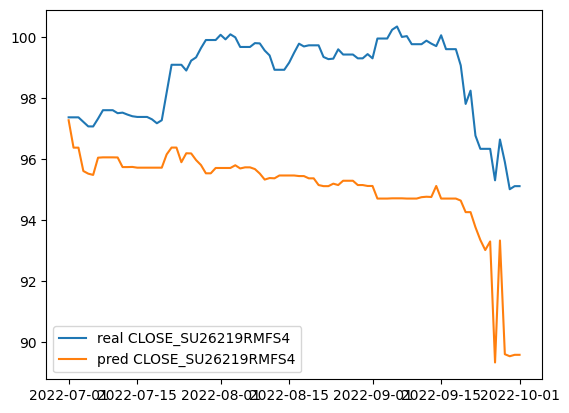

boosting finished for CLOSE_SU26219RMFS4
{'R2': -7.117146789967428, 'MSE': 15.422628410934847, 'model': <catboost.core.CatBoostRegressor object at 0x7accd2997890>}


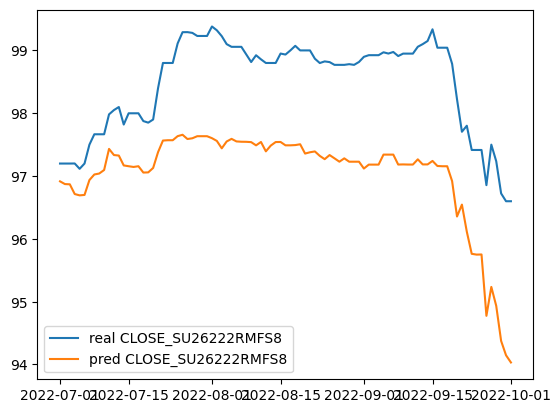

boosting finished for CLOSE_SU26222RMFS8
{'R2': -3.0572635088504185, 'MSE': 2.294167456302941, 'model': <catboost.core.CatBoostRegressor object at 0x7accdd944230>}


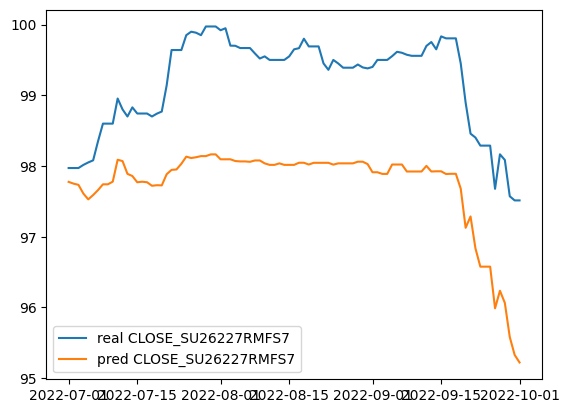

boosting finished for CLOSE_SU26227RMFS7
{'R2': -4.088422701120762, 'MSE': 2.286694983689624, 'model': <catboost.core.CatBoostRegressor object at 0x7accdd95e3f0>}


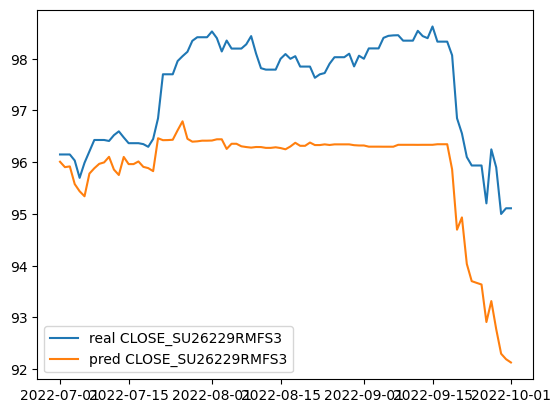

boosting finished for CLOSE_SU26229RMFS3
{'R2': -1.8892603540581154, 'MSE': 2.9743663315503346, 'model': <catboost.core.CatBoostRegressor object at 0x7accd311fd10>}


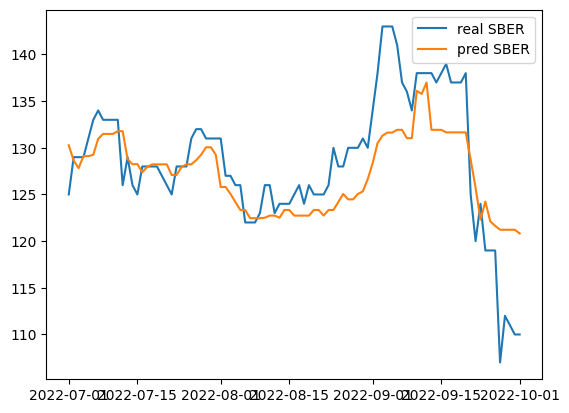

boosting finished for SBER
{'R2': 0.5545418120677311, 'MSE': 22.722333393364156, 'model': <catboost.core.CatBoostRegressor object at 0x7accd2449160>}


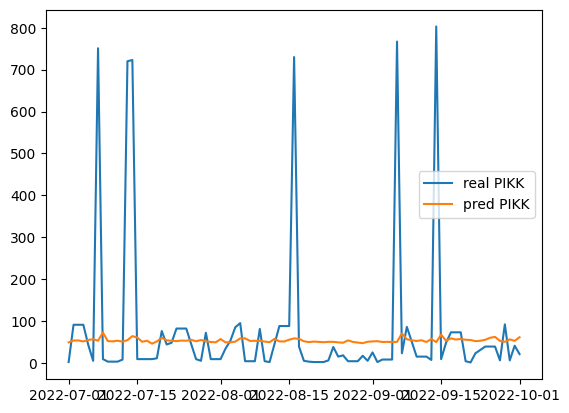

boosting finished for PIKK
{'R2': -0.013718228092506113, 'MSE': 32534.97323789876, 'model': <catboost.core.CatBoostRegressor object at 0x7accd313fc50>}


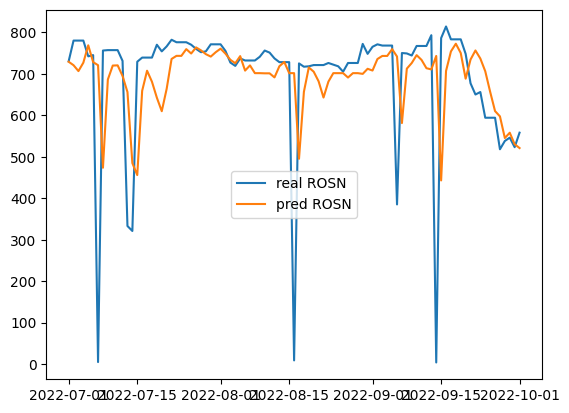

boosting finished for ROSN
{'R2': -0.05502840741116444, 'MSE': 25300.296272330917, 'model': <catboost.core.CatBoostRegressor object at 0x7accc4e4dcd0>}


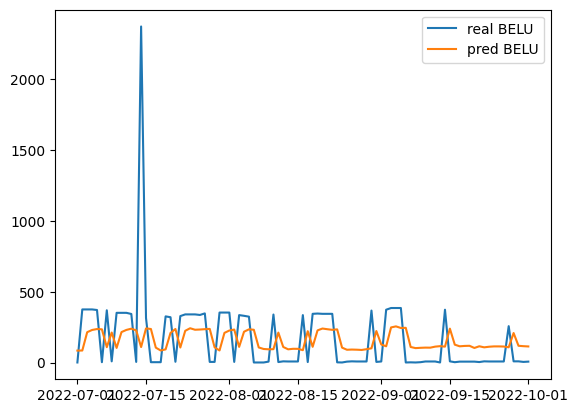

boosting finished for BELU
{'R2': 0.010506521840306426, 'MSE': 80063.83410582058, 'model': <catboost.core.CatBoostRegressor object at 0x7accdd945ac0>}


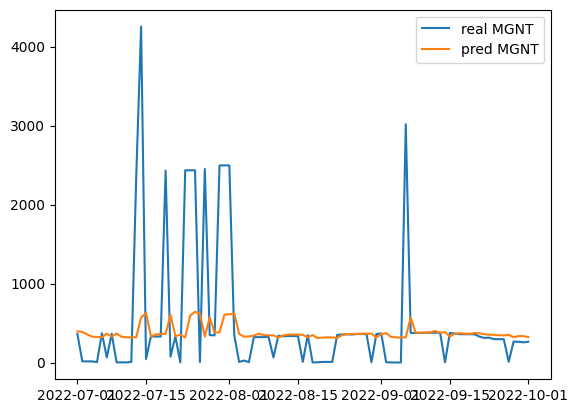

boosting finished for MGNT
{'R2': 0.03840026625077153, 'MSE': 651407.3047829639, 'model': <catboost.core.CatBoostRegressor object at 0x7accc4d49e80>}


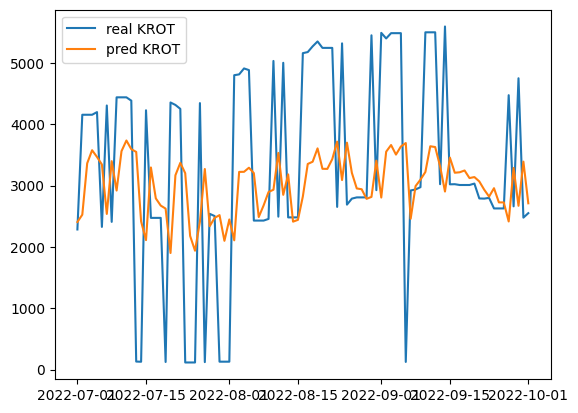

boosting finished for KROT
{'R2': 0.054754821116799746, 'MSE': 2445342.2699073455, 'model': <catboost.core.CatBoostRegressor object at 0x7accd284d9d0>}


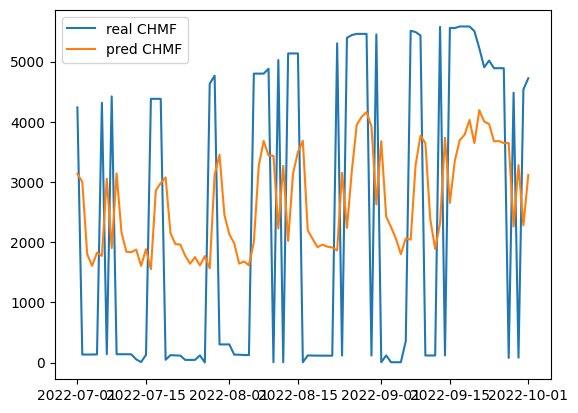

boosting finished for CHMF
{'R2': 0.15942539752371243, 'MSE': 5154763.13171009, 'model': <catboost.core.CatBoostRegressor object at 0x7accd244a8a0>}


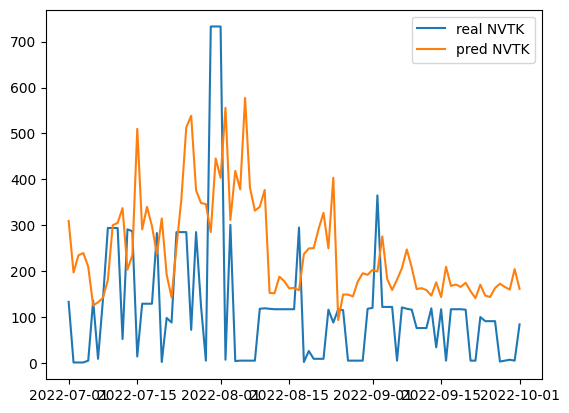

boosting finished for NVTK
{'R2': -1.0141411822915942, 'MSE': 42582.38370070641, 'model': <catboost.core.CatBoostRegressor object at 0x7accd2313860>}


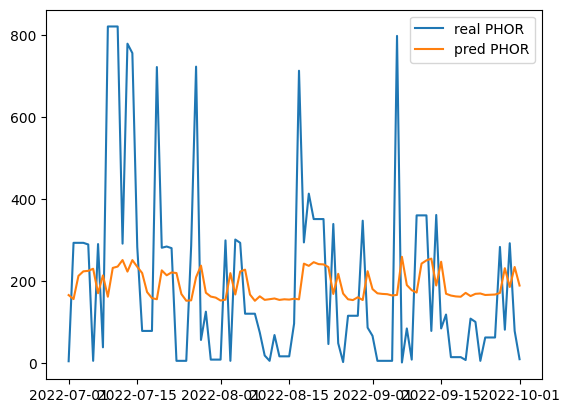

boosting finished for PHOR
{'R2': 0.052021851251041085, 'MSE': 48621.27182756836, 'model': <catboost.core.CatBoostRegressor object at 0x7accd2313f50>}


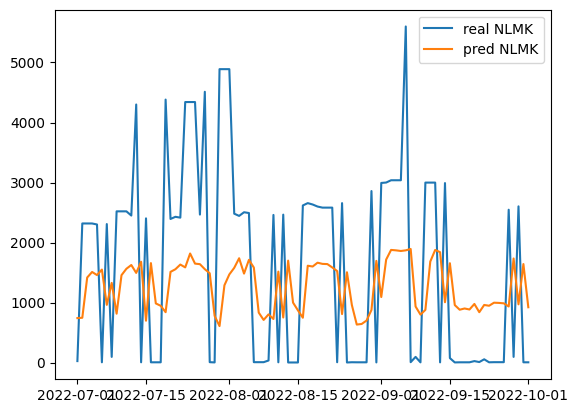

boosting finished for NLMK
{'R2': 0.029489718882286353, 'MSE': 2564642.700999235, 'model': <catboost.core.CatBoostRegressor object at 0x7accd26ee090>}


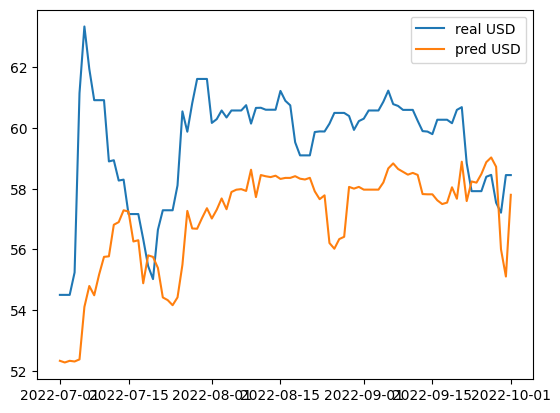

boosting finished for USD
{'R2': -1.8680740566153502, 'MSE': 9.275157189480858, 'model': <catboost.core.CatBoostRegressor object at 0x7accd261bce0>}


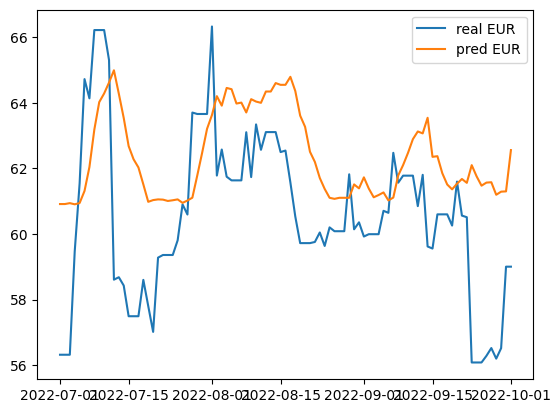

boosting finished for EUR
{'R2': -0.31430319016758346, 'MSE': 7.945980369789699, 'model': <catboost.core.CatBoostRegressor object at 0x7accd2708c80>}


{'CLOSE_SU26218RMFS6': {'R2': 0.9326372711216094,
  'MSE': 0.3913120836516801,
  'model': <catboost.core.CatBoostRegressor at 0x7accd29661e0>},
 'CLOSE_SU26219RMFS4': {'R2': -7.117146789967428,
  'MSE': 15.422628410934847,
  'model': <catboost.core.CatBoostRegressor at 0x7accd2997890>},
 'CLOSE_SU26222RMFS8': {'R2': -3.0572635088504185,
  'MSE': 2.294167456302941,
  'model': <catboost.core.CatBoostRegressor at 0x7accdd944230>},
 'CLOSE_SU26227RMFS7': {'R2': -4.088422701120762,
  'MSE': 2.286694983689624,
  'model': <catboost.core.CatBoostRegressor at 0x7accdd95e3f0>},
 'CLOSE_SU26229RMFS3': {'R2': -1.8892603540581154,
  'MSE': 2.9743663315503346,
  'model': <catboost.core.CatBoostRegressor at 0x7accd311fd10>},
 'SBER': {'R2': 0.5545418120677311,
  'MSE': 22.722333393364156,
  'model': <catboost.core.CatBoostRegressor at 0x7accd2449160>},
 'PIKK': {'R2': -0.013718228092506113,
  'MSE': 32534.97323789876,
  'model': <catboost.core.CatBoostRegressor at 0x7accd313fc50>},
 'ROSN': {'R2': -0

In [58]:
from catboost import CatBoostRegressor
%matplotlib inline  


# Disable warnings for clearer output
warnings.filterwarnings("ignore")

# Initialize the dictionary to store ARIMA models
boosting_models = {}

start_date = '2020-02-01'
threshold_date = '2022-07-01'
end_date = '2022-10-01'

df = create_shifted_columns(merged_df, columns_to_params.keys(), [1, 2, 3, 4, 5, 6, 7, 14, 21, 28, 30, 31])
df = df.dropna()#diff().dropna()
shifted_cols = [col for col in df.columns if '_shift_' in col]

columns_to_subexog = {}

from sklearn.feature_selection import mutual_info_regression

for target in columns_to_models.keys():
    # Calculate mutual information and get top num_features
    sorted_cols = exog.columns[np.argsort(mutual_info_regression(exog.loc[df.index], df[target]))]
    best_cols = sorted_cols[-num_features:]
    columns_to_subexog[target] = exog.loc[df.index, best_cols]

for target_name, exog in columns_to_subexog.items():
    assert len(df) == len(exog), f"{len(differenced_df)} != {len(exog)}"

# Loop through each column to build and store the ARIMA model
for target_name in columns_to_params.keys():

    required_clmns = shifted_cols = [col for col in df.columns if '_shift_' in col and target_name in col]
    X = df[required_clmns].join(columns_to_subexog[target_name])

    result = boosting(X, df[target_name],
                              start_date, threshold_date, end_date, target_name)
    
    if result is None:
        print(f"boosting died for {target_name}")
    else:
        print(f"boosting finished for {target_name}")
        print(result)
        boosting_models[target_name] = result

# Display the ARIMA models dictionary keys to confirm
boosting_models


In [59]:
for target_name, value in boosting_models.items():
    value['model'].save_model(target_name)

In [ ]:
import catboost

In [ ]:
catboost.__version__

'1.2.5'

In [ ]:
object_file

{'CLOSE_SU26218RMFS6': {'R2': -0.42220662331242176,
  'MSE': 8.261640322741343,
  'R2_cv': 0.33261764846389286,
  'MSE_cv': 13.304159742656603,
  'model': RandomForestRegressor(bootstrap=False, max_depth=20, n_estimators=300,
                        random_state=42),
  'best_params': {'bootstrap': False,
   'max_depth': 20,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 300}},
 'CLOSE_SU26219RMFS4': {'R2': -7.9903629225893695,
  'MSE': 17.08174438904023,
  'R2_cv': -0.9706950719090944,
  'MSE_cv': 6.719032573489106,
  'model': RandomForestRegressor(bootstrap=False, max_depth=20, random_state=42),
  'best_params': {'bootstrap': False,
   'max_depth': 20,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 100}},
 'CLOSE_SU26222RMFS8': {'R2': -19.274064084735166,
  'MSE': 11.463908599660657,
  'R2_cv': -3.045410225760574,
  'MSE_cv': 6.096339085258118,
  'model': RandomForestRegressor(max_depth=10, random_state=42),
  'best_params': {'bootstra

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bd1953a7-564f-4095-a5e1-3a8f080fa7e2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>